# $\triangleright$ Our dataset :

$\bullet$ Αυτό το dataset περιέχει 76 χαρακτηριστικά,αλλά από αυτά θα χρησιμοποιήσουμε ένα subset των 14 χαρακτηριστικών.Γενικότερα η Cleveland βάση είναι από τις λίγες βάσεις πάνω στο ML.Το target field της αναφέρεται στην εμφάνιση καρδιακών προβλημάτων σε έναν ασθενή.Η βάση υπάρχει στο <a href="https://www.kaggle.com/ronitf/heart-disease-uci">Kaggle</a> και ονόμαζεται Heart Disease UCI.

$\bullet$ Tι χαρακτηριστικά θα χρησιμοποιήσουμε :

1. age 
2. sex 
3. chest pain type (4 values) 
4. resting blood pressure 
5. serum cholestoral in mg/dl 
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved 
9. exercise induced angina 
10. oldpeak = ST depression induced by exercise relative to rest 
11. the slope of the peak exercise ST segment 
12. number of major vessels (0-3) colored by flourosopy 
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target


$\bullet$ Έχοντας όλα τα παραπάνω χαρακτηριστικά θα μελετήσουμε το συγκεκριμένο πρόβλημα classification δοκιμάζοντας διάφορους μεθόδους χρημοποιώντας βιβλιοθήκες από scikit-learn και tensorflow.

# $\triangleright$ Libraries we use :

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
from feature_selector import FeatureSelector  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt

# $\triangleright$ Read the dataset :

In [2]:
dataset = pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
dataset.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# $\triangleright$ We find the Correlation. 

$\bullet$ Για να βρούμε το correlation μεταξύ των χαρακτηριστικών κατεβάζουμε μια βιβλιοθήκη από το github.Το αποτέλεσμα μας δείχνει ότι τα στοιχεία δεν έχουν τόσο σχέση μεταξύ τους συνεπώς τα κρατάμε όλα για να δημιουργήσουμε το μοντέλο μας.

Library: <a href="https://github.com/WillKoehrsen/feature-selector">Feature Selector</a>

10 features with a correlation magnitude greater than 0.10.

4 features with a correlation magnitude greater than 0.30.



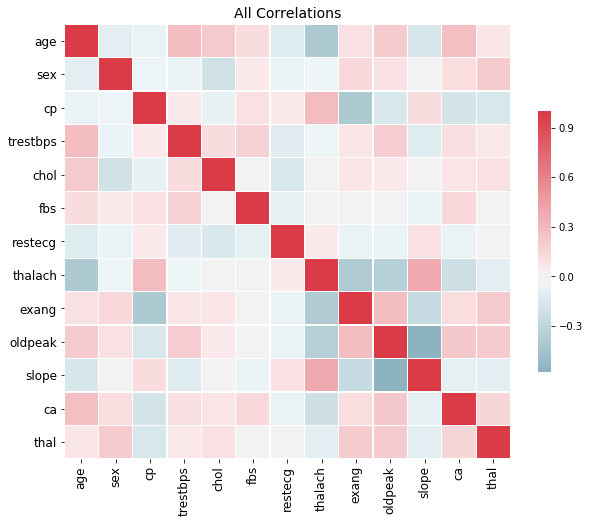

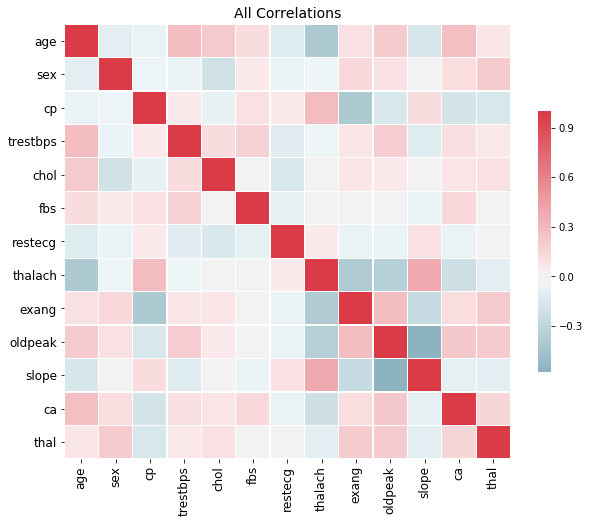

In [4]:
#Separate the data to features,target
columns=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
features = pd.read_csv('heart.csv',usecols=columns)

target = pd.read_csv('heart.csv',usecols=["target"])

#Plot the cor
fs = FeatureSelector(data = features, labels = target)
fs.identify_collinear(correlation_threshold=0.10)
fs.plot_collinear(plot_all=True)

fs = FeatureSelector(data = features, labels = target)
fs.identify_collinear(correlation_threshold=0.30)
fs.plot_collinear(plot_all=True)

# $\triangleright$ Normalization:

$\bullet$ Στην συνέχεια κάνουμε normalization τα δεδομένα μας με την προοπτική οι αλγόριθμοι να συγκλίνουν πιο γρήγορα και να έχουμε και καλύτερη ακρίβεια.Για να το πετύχουμε αυτό χρησιμοποιούμε το MinMaxScaler της scikit-learn.

In [5]:
#Turn to array
features = np.array(features)
target = np.array(target)

#Normalization
scaler = MinMaxScaler(feature_range=(0, 1))
features = scaler.fit_transform(features)
print(features)

[[0.70833333 1.         1.         ... 0.         0.         0.33333333]
 [0.16666667 1.         0.66666667 ... 0.         0.         0.66666667]
 [0.25       0.         0.33333333 ... 1.         0.         0.66666667]
 ...
 [0.8125     1.         0.         ... 0.5        0.5        1.        ]
 [0.58333333 1.         0.         ... 0.5        0.25       1.        ]
 [0.58333333 0.         0.33333333 ... 0.5        0.25       0.66666667]]


# $\triangleright$ Train-Test split

$\bullet$ Από όλα τα δεδομένα κάποια χρησιμοποιούμε για train και κάποια τα κρατάμε για το testing.

In [6]:
#Split the data in order to train and test the model
trainX,testX,trainY,testY = train_test_split(features,target,test_size=0.3)

#Turn to array
trainX = np.array(trainX)
testX = np.array(testX)
trainY = np.array(trainY)
testY = np.array(testY)

# $\triangleright$ Decision Tree Classifier

$\bullet$ Το δέντρο αποφάσεως διαιρεί επαναληπτικά το dataset μας σε sub part χρησιμοποιώντας κάποιες αναγνωριστικές ευθείες.(Επαναληπτικά επειδή μπορεί να υπάρχουν δυο περιοχές της ίδιας κλάσης που διαιρούνται από άλλες).

<img src="images/div.png"/>

Πότε σταματάει ;

* Όταν έχει διαιρέσει σε κλάσσεις που είναι καθαρές(pure)(περιέχουν μονο χαρακτηριστικά μιας κλάσσης).
* Όταν συναντάμε συγκεκριμένες περιπτώσεις στα χαρακτηριστικά.

Για το διαχωρισμό των τμημάτων καθοριστικό ρόλο έχουν:

* Ιmpurity -> Βλέπουμε δείγματα μια κλάσης σε μια άλλη.
* Entropy -> Μετρική του impurity για κάποιο χαρακτηριστικό.(Υπάρχει και το gini impurity)

Βέβαια για να δημιουργήσουμε το δέντρο πρέπει να επιλέξουμε ποιο χαρακτηριστικό θα λάβουμε υπόψη κάθε φορα για τον διαχωρισμό.Το παραπάνω μας το καθορίζει το information gain που ορίζεται ως εξής :

 <strong>Information Gain (n) = Entropy(x) — ( weighted average * entropy(children for feature))</strong>

Συνεπώς επιλέγουμε κάθε φορα το χαρακτηριστικό με το μεγαλύτερο information gain για την δημιουργία του δέντρου.




# $\triangleright$ Train the Classifier

In [7]:
#Initialize and train the classifier
clf = DecisionTreeClassifier()
clf = clf.fit(trainX, trainY)

# $\triangleright$ Test the Classifier

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
print("Cross Validation Scores: \n")
print(cross_val_score(clf,trainX,trainY.flatten(), cv=10))
print()

#Test the classifier in order to get some metrics
yPred = clf.predict(testX)
accuracy = accuracy_score(testY,yPred)
print("Accuracy: ",accuracy)
print("Confusion Matrix: ")
print(confusion_matrix(testY,yPred))
print("F1 Score: ")
print(f1_score(testY, yPred, average='macro'))

Cross Validation Scores: 

[0.72727273 0.63636364 0.72727273 0.63636364 0.81818182 0.71428571
 0.71428571 0.5        0.9        0.75      ]

Accuracy:  0.7912087912087912
Confusion Matrix: 
[[34  7]
 [12 38]]
F1 Score: 
0.7908045977011494


# $\triangleright$ Visualize the tree

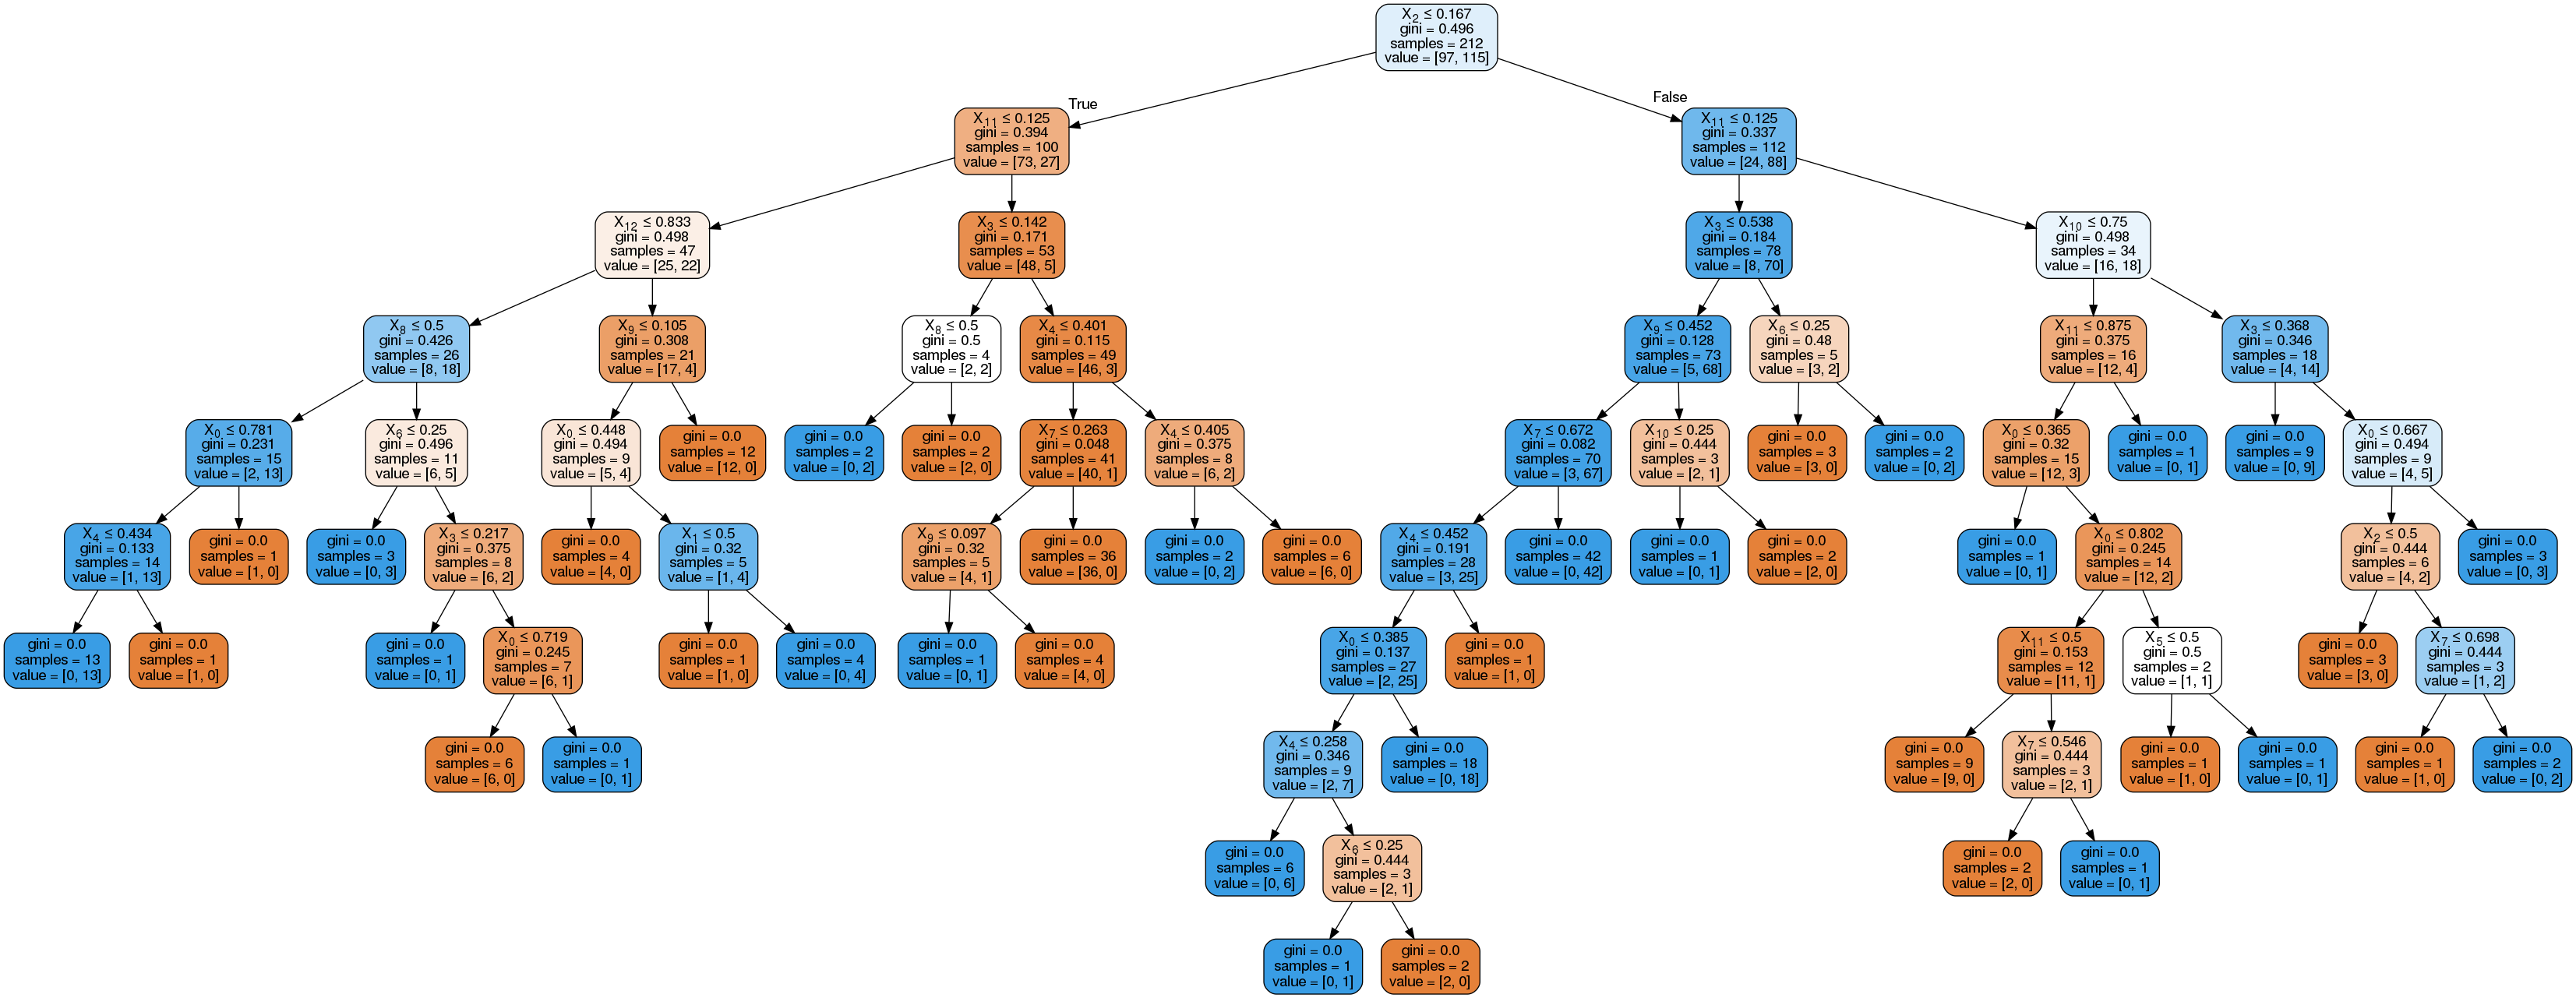

In [9]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# $\triangleright$ Random Forest Classifier

$\bullet$ Ο Random Forest Classifier ανήκει στην κατηγορία των ensemble αλγόριθμων.Αυτοί οι αλγόριθμοι συνδυάζουν περισσότερους απο έναν αλγόριθμους της ίδιας η διαφορετικής κατηγορίας για να κάνουν το classify.Συνεπώς ο αλγόριθμος μας δημιουργεί ένα set από δέντρα αποφάσεων από τυχαία subset του training set.Στην συνέχεια με βάση τα τυχαία δέντρα αποφασίζει την τελική κλάσση για το εκάστοτε test.

$\bullet$ Ας υποθέσουμε ότι μας δίνουν σαν training set:[X1,X2,X3,X4] με τα αντίστοιχα labels [L1,L2,L3,L4].Ο Random Forrest δημιουργεί 3 δέντρα αποφάσεων από το input που του δίνουμε:

* [X1, X2, X3]
* [X1, X2, X4]
* [X2, X3, X4]

$\bullet$ Και οι προβλέψεις του μοντέλου βασίζονται σε αυτά τα δέντρα αποφάσεων.

# $\triangleright$ Train the Classifier

In [10]:
#Initialize and train the classifier
clf = RandomForestClassifier(n_estimators=len(features), max_depth=None)
clf.fit(trainX,trainY.flatten())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=303, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# $\triangleright$ Test the Classifier

In [11]:
from sklearn.model_selection import cross_val_score
print("Cross Validation Scores: \n")
print(cross_val_score(clf,trainX,trainY.flatten(), cv=10))
print()

#Test the classifier in order to get some metrics
yPred = clf.predict(testX)
accuracy = accuracy_score(testY,yPred)
print("Accuracy: ",accuracy)
print("Confusion Matrix: ")
print(confusion_matrix(testY,yPred))
print("F1 Score: ")
print(f1_score(testY, yPred, average='macro'))

Cross Validation Scores: 

[0.81818182 0.68181818 0.72727273 0.72727273 0.90909091 0.85714286
 0.71428571 0.7        0.95       0.85      ]

Accuracy:  0.8681318681318682
Confusion Matrix: 
[[33  8]
 [ 4 46]]
F1 Score: 
0.8653846153846154


# $\triangleright$ Visualize some of the trees that random forrest generates

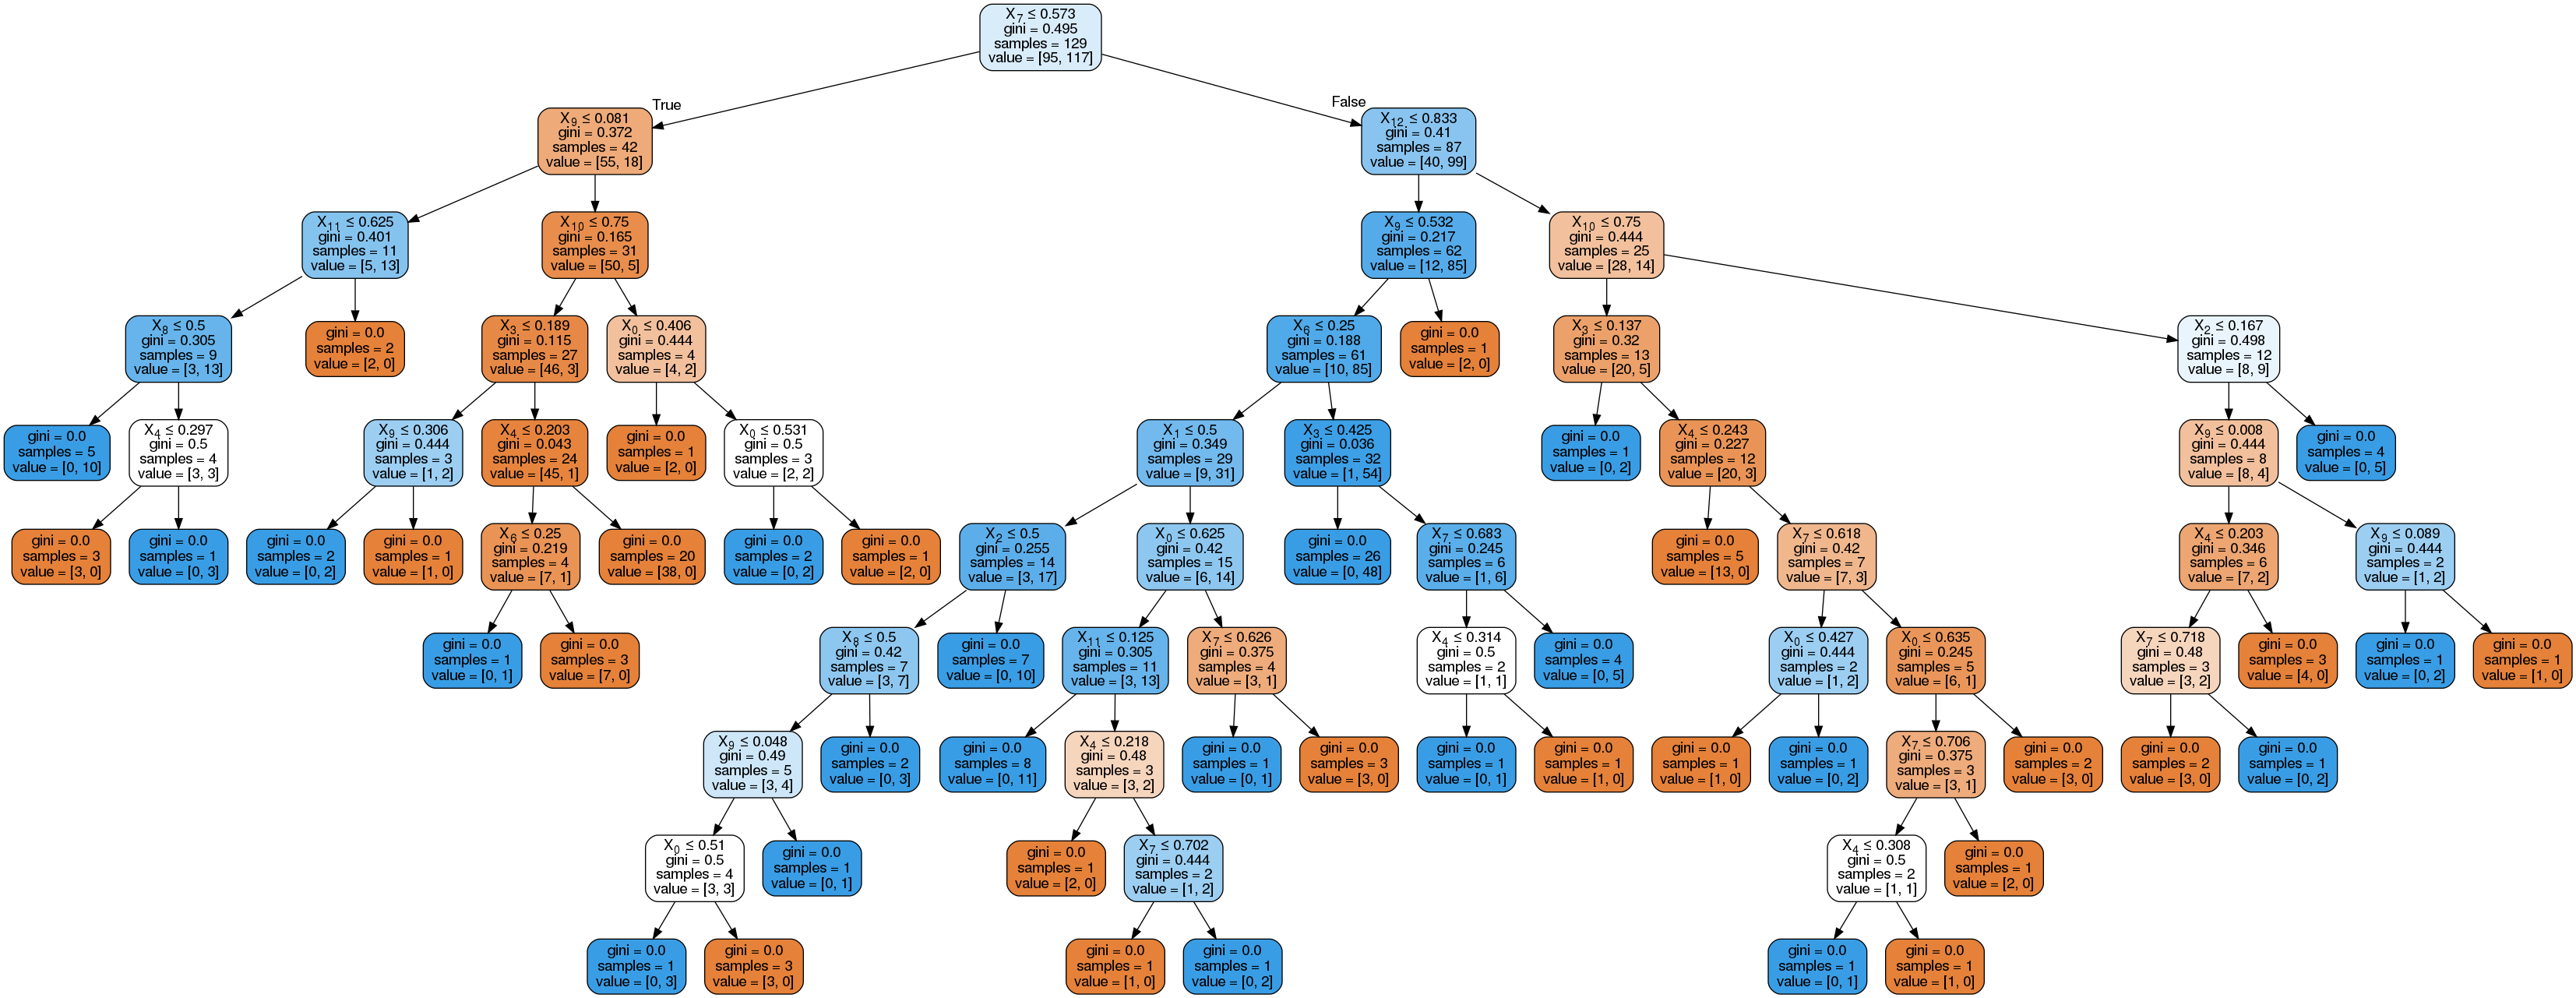

In [12]:
estimator = clf.estimators_[0]
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

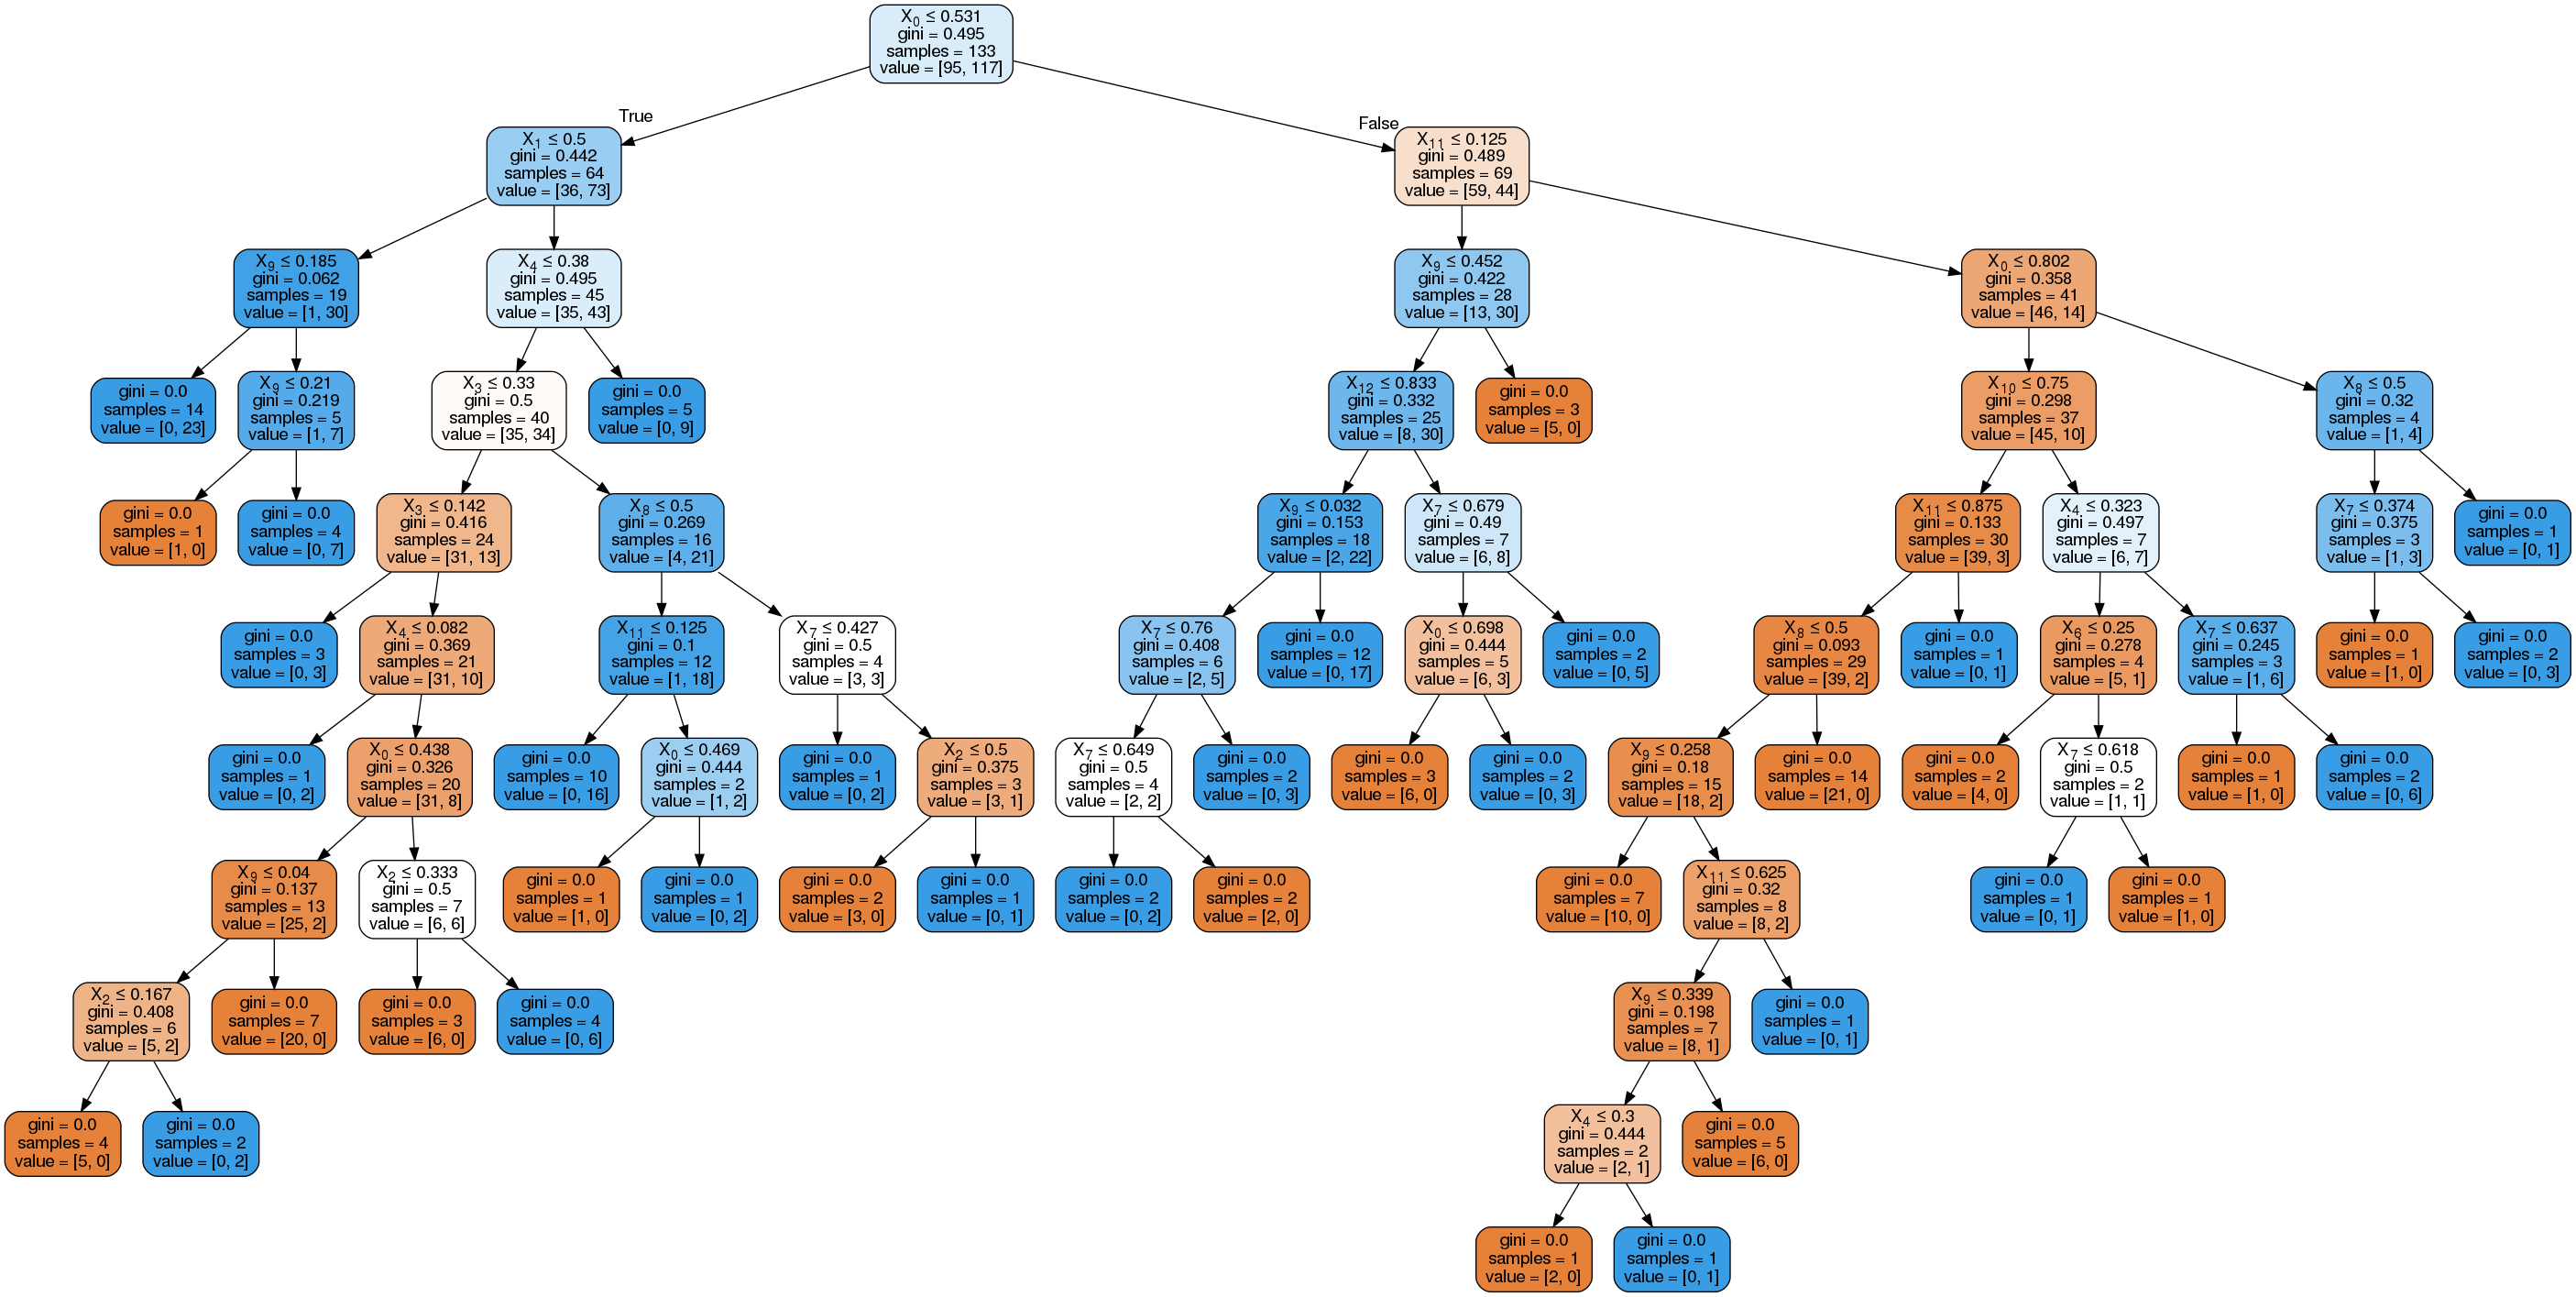

In [13]:
estimator = clf.estimators_[3]
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# $\triangleright$ K-Nearest Neighbors Classifier

$\bullet$ O KNN αποτελεί εναν ακόμη απλό σχετικά αλγόριθμο για supervised learning ,ο οποίος δεν έχει κάποιο training step μιας και εκμεταλλεύεται όλα τα data points που του δίνουμε για το prediction.Αν και δεν θέλει train η φάση της πρόβλεψης κοστίζει αφού χρησιμοποιούμε όλο το dataset που μας δίνεται.

$\bullet$ Ο ΚΝΝ παίρνει τους Κ κοντινότερους γείτονες για να αποφασίσει σε ποια κλάση ανήκει το καινούργιο data point χρησιμοποιώντας την μέθοδο του feature similarity.Η τιμή του K καθορίζεται από εμάς και το μόνο που μας μένει είναι να δοκιμάσουμε διάφορες τιμές για να βρούμε την κατάλληλη που ταιριάζει στην περίπτωση μας.

Πώς λειτουργεί ο KNN ; 

* Επιλέγουμε την τιμή του Κ.
* Βρίσκουμε την απόσταση του νέου μας σημείου από κάθε training instance.
* Βρίσκουμε τους Κ πλησιέστερους γείτονες του νέου αυτού σημείου.
* Το σημείο θα ανήκει στην κλάσση που έχουν οι περισσότεροι Κ πλησιέστεροι γείτονες του.

Την απόσταση μπορούμε να την υπολογίσουμε με τα παρακάτω :

* Euclidean distance
* Manhattan distance
* Hamming Distance
* Minkowski Distance


# $\triangleright$ Testing for different K values

Best K: 50  Accuracy:  0.8791208791208791  Best Distance:  manhattan


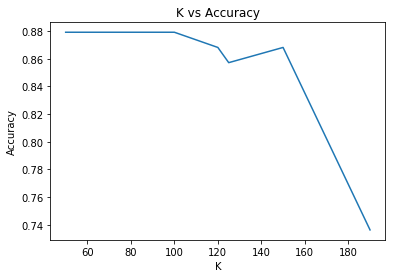

In [14]:
import sys
K = [50,100,120,125,150,190]
distance=['euclidean','manhattan','hamming','minkowski']

bestK=0
bestDistance=""
bestAcc=0

acc = []
iqq=0
for kk in K:
    tempDistance=""
    tempAcc=0
    
    for dist in distance:
        neigh = KNeighborsClassifier(algorithm='auto',n_neighbors=(kk),metric=dist)
        neigh.fit(trainX,trainY.flatten())

        #Test the classifier in order to get some metrics
        yPred = neigh.predict(testX)
        acc_sc = accuracy_score(testY,yPred)
        
        #Get the best distance for a specific K
        if(acc_sc > tempAcc):
            tempDistance=dist
            tempAcc=acc_sc
    
    #Check if the best K and distance has changed
    if(tempAcc > bestAcc):
        bestK=kk
        bestDistance=tempDistance
        bestAcc=tempAcc
    acc.append(tempAcc)

plt.title("K vs Accuracy")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(K,acc)

print("Best K:",bestK," Accuracy: ",bestAcc," Best Distance: ",bestDistance)

$\bullet$ Επομένως δοκιμάζοντας διάφορες τιμές για το Κ καταλήγουμε ότι το κατάλληλο για εμάς είναι K = 120 διοτί μετά από αυτό το accuracy μας πέφτει.

# $\triangleright$ KNN for K 100 and Distane hamming

In [15]:
neigh = KNeighborsClassifier(algorithm='auto',n_neighbors=(bestK),metric="hamming")
neigh.fit(trainX,trainY.flatten())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='hamming',
           metric_params=None, n_jobs=None, n_neighbors=50, p=2,
           weights='uniform')

# $\triangleright$ Test the Classifier

In [16]:
#Test the classifier in order to get some metrics
yPred = neigh.predict(testX)
accuracy = accuracy_score(testY,yPred)
print("Accuracy: ",accuracy)
print("Confusion Matrix: ")
print(confusion_matrix(testY,yPred))
print("F1 Score: ")
print(f1_score(testY, yPred, average='macro'))

Accuracy:  0.8571428571428571
Confusion Matrix: 
[[31 10]
 [ 3 47]]
F1 Score: 
0.8525856697819314


# $\triangleright$ Logistic Regression Classifier

Η Logistic Regression είναι ενας Machine Learning classification αλγόριθμος που χρησιμοποιείται για να προβλέψει την πιθανότητα κατηγορικής εξαρτημένης μεταβλητής.Αυτή η μεταβλήτη είναι δυαδική και περιέχει δεδομένα που αντιστοιχίζονται στο 1(yes,success) και στο 0 (no,failure).

Αυτός ο αλγόριθμος χρησιμοποεί την sigmoid συνάρτηση.Με αυτην προσπαθεί να διαχωρίσει την μια κλάση από την αλλή.
$$\sigma(t) = \frac{e^{t}}{e^{t}+1}$$
Όπως βλέπουμε και στο σχήμα:
<img src="images/log.png"/>

Ας υποθέσουμε ότι το $t = β_0 + β_1x$ τότε η συνάρτηση Logistic γίνεται:

$$p(x) = \frac{1}{1 + e^{-(β_0+β_1x)}}$$

Αυτό βοηθάει και όταν έχουμε outliers διότι με την ιδιότητα της sigmoid υπάρχει σωστή κατηγοροιοποίηση.

<img src="images/log1.png"/>

Συνεπώς με decision boundary την sigmoid κατηγοριοποιούνται τα χαρακτηριστικά του dataset στην σωστή κατηγορία στηριζόμενοι στον παραπάνω τύπο των πιθανοτήτων.

# $\triangleright$ Train logistic regression classifier

In [17]:
from sklearn.linear_model import LogisticRegression
#Initialize and train the classifier
clf = LogisticRegression(random_state=0, solver='liblinear',multi_class="auto")
print(clf.fit(trainX,trainY.flatten()))
print("Weights: ")
print(clf.coef_[0])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=0, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
Weights: 
[-0.18744452 -0.99304003  1.77063315 -1.12865931 -0.38359236 -0.00790814
  0.77847612  1.12267977 -0.75409074 -1.12100767  1.51547998 -1.69217709
 -1.32290708]


# $\triangleright$ Test the Classifier

In [18]:
#Test the classifier in order to get some metrics
yPred = clf.predict(testX)
accuracy = accuracy_score(testY,yPred)
print("Accuracy: ",accuracy)
print("Confusion Matrix: ")
print(confusion_matrix(testY,yPred))
print("F1 Score: ")
print(f1_score(testY, yPred, average='macro'))

Accuracy:  0.8681318681318682
Confusion Matrix: 
[[32  9]
 [ 3 47]]
F1 Score: 
0.8644488579940417


# $\triangleright$ Support Vector Machines

$\bullet$ Η ιδέα του Support Vector Machines είναι απλή.Ο αλγόριθμος δημιουργεί μια γραμμή(hyperplane) που διαχωρίζει τις κλάσσεις σε ένα πρόβλημα classification.Ο στόχος της γραμμής είναι να μεγιστοποιείται το margin ανάμεσα στα σημεία και στα δυο sections της γραμμής.Το κέρδος αυτού του αλγορίθμου είναι ότι μετά τον διαχωρισμό το μοντέλο μπορεί εύκολα να προβλέψει σε ποια κλάσση ανήκει ένα καινούργιο test case.
<img src="images/svm.png"/>

Ο παραπάνω αλγόριθμος λειτουργεί πολύ ικανοποιητικά και σε μεγάλες διαστάσεις εξαιτίας του kernel trick που με λίγα λόγια βοηθάει στο μετασχηματισμό των δεδομένων σε διαφορετικές διαστάσεις με σκοπό να μπορεί να δημιουργηθεί αυτή η γραμμή(hyperplane) στις νέες διαστάσεις.
<img src="images/svm2.png"/>


Οι παράμετροι που καθορίζουν την SVM είναι οι εξής :

* kernel (rbf,linear,poly) : Για να μετασχηματίσουμε τα δεδομένα.
* Gamma : Μεγάλο Gamma προσπαθεί να προσαρμόσει το hyperplane στα training δεδομένα.
* C : Ελέγχει το tradeoff ανάμεσα στην ομαλότητα της γραμμής και στην ακρίβεια του μοντέλου.

# $\triangleright$ Tweaking parameters

In [19]:
from sklearn.svm import SVC

kernels=['rbf','poly','linear']
Gamma = [0.1,1,10,100,1000]
C = [0.0001,0.001,0.01,0.1,1,10,100]

bestGamma=0
bestC=0
bestKernel=""
bestAcc = 0

for k in C:
    for j in Gamma:
        for l in kernels:
            clf = SVC(gamma=j,kernel=l,C=k)
            clf.fit(trainX,trainY.flatten()) 
            yPred = clf.predict(testX)
            
            if(accuracy_score(testY,yPred) > bestAcc):
                bestGamma=j
                bestC=k
                bestKernel=l
                bestAcc =accuracy_score(testY,yPred)
print("Best Parameters: ")
print("C: ",bestC,"Gamma: ",bestGamma,"Kernel: ",bestKernel,"Accuracy: ",bestAcc)            

Best Parameters: 
C:  0.01 Gamma:  1 Kernel:  poly Accuracy:  0.8901098901098901


# $\triangleright$ Train the Classifier

In [20]:
clf = SVC(gamma=bestGamma,kernel=bestKernel,C=bestC)
clf.fit(trainX,trainY.flatten()) 

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# $\triangleright$ Test the Classifier

In [21]:
#Test the classifier in order to get some metrics
yPred = clf.predict(testX)
accuracy = accuracy_score(testY,yPred)
print("Accuracy: ",accuracy)
print("Confusion Matrix: ")
print(confusion_matrix(testY,yPred))
print("F1 Score: ")
print(f1_score(testY, yPred, average='macro'))

Accuracy:  0.8901098901098901
Confusion Matrix: 
[[32  9]
 [ 1 49]]
F1 Score: 
0.8861361361361362


# $\triangleright$ Using tensorflow

# $\triangleright$ Turn data to dictionary

In [22]:
#Transofrm the data to dictionary format in order to use as a tensor
trainX={'age':trainX[:,0],'sex':trainX[:,1],'cp':trainX[:,2],'trestbps':trainX[:,3],'chol':trainX[:,4],'fbs':trainX[:,5],'restecg':trainX[:,6],'thalach':trainX[:,7],'exang':trainX[:,8],'oldpeak':trainX[:,9],'slope':trainX[:,10],'ca':trainX[:,11],'thal':trainX[:,12]}
testX={'age':testX[:,0],'sex':testX[:,1],'cp':testX[:,2],'trestbps':testX[:,3],'chol':testX[:,4],'fbs':testX[:,5],'restecg':testX[:,6],'thalach':testX[:,7],'exang':testX[:,8],'oldpeak':testX[:,9],'slope':testX[:,10],'ca':testX[:,11],'thal':testX[:,12]}

# $\triangleright$ Create the feature columns to be accessed in the model

In [23]:
#Create the feature columns
feature_columns = [tf.feature_column.numeric_column(k) for k in columns]

# $\triangleright$ Preparing the inputs for train,test

In [24]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(
 x=trainX,
 y=trainY,
 num_epochs=None,
 batch_size=1,
 shuffle=True
)

evaluateInputFunction = tf.estimator.inputs.numpy_input_fn(
    x=testX,
    y=testY,
    num_epochs=1,
    shuffle=False
)

# $\triangleright$ Tweaking parameters

In [25]:
# 180,200 0.001
hidd_layer = [[50,20],[80,20],[80,60],[100,40],[100,60],[100,100],[140,100],[180,100]]
learning_rate = [0.00001,0.0001,0.001,0.002,0.005,0.01,0.1]
#Create the model
bestAcc = 0
best_hid=None
best_rate=None
for item in hidd_layer:
    for l in learning_rate:
        dnnClassifierModel = tf.estimator.DNNClassifier(
        feature_columns=feature_columns,
            hidden_units=item,
            optimizer=tf.train.ProximalAdagradOptimizer(
              learning_rate=l,
              l1_regularization_strength=0.001
            ))
        #Train the model
        dnnClassifierModel.train(input_fn=train_input_fn, steps=10000)
        acc=dnnClassifierModel.evaluate(evaluateInputFunction)['accuracy']
        
        if(bestAcc < acc):
            bestAcc=acc
            best_hid = item
            best_rate = l
print("Accuracy: ",bestAcc," Best Hidden: ",best_hid,"Rate: ",best_rate)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpb753mkml', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f0914ba94a8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.

INFO:tensorflow:global_step/sec: 608.742
INFO:tensorflow:loss = 0.9161296, step = 5401 (0.166 sec)
INFO:tensorflow:global_step/sec: 749.027
INFO:tensorflow:loss = 0.7993494, step = 5501 (0.138 sec)
INFO:tensorflow:global_step/sec: 798.824
INFO:tensorflow:loss = 0.42330745, step = 5601 (0.119 sec)
INFO:tensorflow:global_step/sec: 754.773
INFO:tensorflow:loss = 0.47335845, step = 5701 (0.134 sec)
INFO:tensorflow:global_step/sec: 754.597
INFO:tensorflow:loss = 0.36962008, step = 5801 (0.131 sec)
INFO:tensorflow:global_step/sec: 778.9
INFO:tensorflow:loss = 0.9869898, step = 5901 (0.130 sec)
INFO:tensorflow:global_step/sec: 865.633
INFO:tensorflow:loss = 0.58855474, step = 6001 (0.124 sec)
INFO:tensorflow:global_step/sec: 712.993
INFO:tensorflow:loss = 0.8674545, step = 6101 (0.130 sec)
INFO:tensorflow:global_step/sec: 867.825
INFO:tensorflow:loss = 0.449549, step = 6201 (0.116 sec)
INFO:tensorflow:global_step/sec: 750.566
INFO:tensorflow:loss = 0.8491883, step = 6301 (0.133 sec)
INFO:tens

INFO:tensorflow:loss = 0.7201439, step = 601 (0.138 sec)
INFO:tensorflow:global_step/sec: 760.35
INFO:tensorflow:loss = 0.58416045, step = 701 (0.131 sec)
INFO:tensorflow:global_step/sec: 768.06
INFO:tensorflow:loss = 0.53789276, step = 801 (0.130 sec)
INFO:tensorflow:global_step/sec: 726.171
INFO:tensorflow:loss = 0.5628254, step = 901 (0.137 sec)
INFO:tensorflow:global_step/sec: 817.398
INFO:tensorflow:loss = 0.6236887, step = 1001 (0.125 sec)
INFO:tensorflow:global_step/sec: 758.439
INFO:tensorflow:loss = 0.73052394, step = 1101 (0.129 sec)
INFO:tensorflow:global_step/sec: 756.505
INFO:tensorflow:loss = 0.73778445, step = 1201 (0.132 sec)
INFO:tensorflow:global_step/sec: 751.029
INFO:tensorflow:loss = 0.8051508, step = 1301 (0.134 sec)
INFO:tensorflow:global_step/sec: 753.028
INFO:tensorflow:loss = 0.6572031, step = 1401 (0.134 sec)
INFO:tensorflow:global_step/sec: 757.646
INFO:tensorflow:loss = 0.81767774, step = 1501 (0.130 sec)
INFO:tensorflow:global_step/sec: 852.456
INFO:tensor

INFO:tensorflow:global_step/sec: 758.148
INFO:tensorflow:loss = 0.5943208, step = 8901 (0.131 sec)
INFO:tensorflow:global_step/sec: 749.766
INFO:tensorflow:loss = 0.7339834, step = 9001 (0.134 sec)
INFO:tensorflow:global_step/sec: 757.045
INFO:tensorflow:loss = 0.7199199, step = 9101 (0.132 sec)
INFO:tensorflow:global_step/sec: 775.408
INFO:tensorflow:loss = 0.7502171, step = 9201 (0.130 sec)
INFO:tensorflow:global_step/sec: 647.868
INFO:tensorflow:loss = 0.85851127, step = 9301 (0.152 sec)
INFO:tensorflow:global_step/sec: 745.414
INFO:tensorflow:loss = 0.6998152, step = 9401 (0.137 sec)
INFO:tensorflow:global_step/sec: 757.405
INFO:tensorflow:loss = 0.6362029, step = 9501 (0.130 sec)
INFO:tensorflow:global_step/sec: 696.504
INFO:tensorflow:loss = 0.65979344, step = 9601 (0.144 sec)
INFO:tensorflow:global_step/sec: 718.973
INFO:tensorflow:loss = 0.74266243, step = 9701 (0.139 sec)
INFO:tensorflow:global_step/sec: 723.422
INFO:tensorflow:loss = 0.6044318, step = 9801 (0.140 sec)
INFO:te

INFO:tensorflow:global_step/sec: 742.097
INFO:tensorflow:loss = 0.6620976, step = 4801 (0.134 sec)
INFO:tensorflow:global_step/sec: 695.762
INFO:tensorflow:loss = 0.33979738, step = 4901 (0.143 sec)
INFO:tensorflow:global_step/sec: 785.662
INFO:tensorflow:loss = 0.3047349, step = 5001 (0.129 sec)
INFO:tensorflow:global_step/sec: 915.961
INFO:tensorflow:loss = 0.22723988, step = 5101 (0.108 sec)
INFO:tensorflow:global_step/sec: 690.783
INFO:tensorflow:loss = 0.68962955, step = 5201 (0.143 sec)
INFO:tensorflow:global_step/sec: 716.325
INFO:tensorflow:loss = 0.3354353, step = 5301 (0.148 sec)
INFO:tensorflow:global_step/sec: 761.849
INFO:tensorflow:loss = 0.23908758, step = 5401 (0.125 sec)
INFO:tensorflow:global_step/sec: 803.31
INFO:tensorflow:loss = 0.69862163, step = 5501 (0.123 sec)
INFO:tensorflow:global_step/sec: 758.69
INFO:tensorflow:loss = 0.44393495, step = 5601 (0.132 sec)
INFO:tensorflow:global_step/sec: 740.133
INFO:tensorflow:loss = 0.2957903, step = 5701 (0.134 sec)
INFO:t

INFO:tensorflow:global_step/sec: 741.798
INFO:tensorflow:loss = 0.70798033, step = 701 (0.137 sec)
INFO:tensorflow:global_step/sec: 779.439
INFO:tensorflow:loss = 0.7048348, step = 801 (0.126 sec)
INFO:tensorflow:global_step/sec: 783.985
INFO:tensorflow:loss = 0.7092969, step = 901 (0.132 sec)
INFO:tensorflow:global_step/sec: 716.77
INFO:tensorflow:loss = 0.60932434, step = 1001 (0.136 sec)
INFO:tensorflow:global_step/sec: 715.033
INFO:tensorflow:loss = 0.6906586, step = 1101 (0.140 sec)
INFO:tensorflow:global_step/sec: 732.63
INFO:tensorflow:loss = 0.6350311, step = 1201 (0.141 sec)
INFO:tensorflow:global_step/sec: 703.532
INFO:tensorflow:loss = 0.6121008, step = 1301 (0.141 sec)
INFO:tensorflow:global_step/sec: 730.505
INFO:tensorflow:loss = 0.6373145, step = 1401 (0.134 sec)
INFO:tensorflow:global_step/sec: 719.227
INFO:tensorflow:loss = 0.72003186, step = 1501 (0.140 sec)
INFO:tensorflow:global_step/sec: 803.685
INFO:tensorflow:loss = 0.52526003, step = 1601 (0.125 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 703.187
INFO:tensorflow:loss = 0.20624231, step = 9001 (0.141 sec)
INFO:tensorflow:global_step/sec: 745.124
INFO:tensorflow:loss = 0.6422923, step = 9101 (0.135 sec)
INFO:tensorflow:global_step/sec: 717.354
INFO:tensorflow:loss = 0.49437547, step = 9201 (0.139 sec)
INFO:tensorflow:global_step/sec: 775.77
INFO:tensorflow:loss = 0.85756844, step = 9301 (0.129 sec)
INFO:tensorflow:global_step/sec: 712.621
INFO:tensorflow:loss = 0.30065042, step = 9401 (0.142 sec)
INFO:tensorflow:global_step/sec: 772.948
INFO:tensorflow:loss = 0.37203395, step = 9501 (0.128 sec)
INFO:tensorflow:global_step/sec: 724.132
INFO:tensorflow:loss = 0.15465252, step = 9601 (0.138 sec)
INFO:tensorflow:global_step/sec: 751.778
INFO:tensorflow:loss = 0.30732268, step = 9701 (0.133 sec)
INFO:tensorflow:global_step/sec: 802.506
INFO:tensorflow:loss = 0.2731269, step = 9801 (0.124 sec)
INFO:tensorflow:global_step/sec: 733.734
INFO:tensorflow:loss = 0.2703243, step = 9901 (0.137 sec)
INFO

INFO:tensorflow:global_step/sec: 823.216
INFO:tensorflow:loss = 0.1687761, step = 4901 (0.121 sec)
INFO:tensorflow:global_step/sec: 731.526
INFO:tensorflow:loss = 0.12753338, step = 5001 (0.137 sec)
INFO:tensorflow:global_step/sec: 820.469
INFO:tensorflow:loss = 0.13333774, step = 5101 (0.121 sec)
INFO:tensorflow:global_step/sec: 763.428
INFO:tensorflow:loss = 0.07259482, step = 5201 (0.132 sec)
INFO:tensorflow:global_step/sec: 755.709
INFO:tensorflow:loss = 0.6179207, step = 5301 (0.131 sec)
INFO:tensorflow:global_step/sec: 675.64
INFO:tensorflow:loss = 1.52939, step = 5401 (0.148 sec)
INFO:tensorflow:global_step/sec: 767.052
INFO:tensorflow:loss = 1.5170057, step = 5501 (0.131 sec)
INFO:tensorflow:global_step/sec: 796.4
INFO:tensorflow:loss = 0.94839597, step = 5601 (0.126 sec)
INFO:tensorflow:global_step/sec: 688.414
INFO:tensorflow:loss = 0.7373227, step = 5701 (0.145 sec)
INFO:tensorflow:global_step/sec: 731.063
INFO:tensorflow:loss = 0.29463023, step = 5801 (0.137 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 740.876
INFO:tensorflow:loss = 0.23246905, step = 801 (0.138 sec)
INFO:tensorflow:global_step/sec: 736.749
INFO:tensorflow:loss = 0.3195644, step = 901 (0.136 sec)
INFO:tensorflow:global_step/sec: 801.99
INFO:tensorflow:loss = 0.34189454, step = 1001 (0.124 sec)
INFO:tensorflow:global_step/sec: 710.606
INFO:tensorflow:loss = 0.49029988, step = 1101 (0.141 sec)
INFO:tensorflow:global_step/sec: 723.267
INFO:tensorflow:loss = 0.2797141, step = 1201 (0.135 sec)
INFO:tensorflow:global_step/sec: 795.43
INFO:tensorflow:loss = 0.9225062, step = 1301 (0.127 sec)
INFO:tensorflow:global_step/sec: 855.406
INFO:tensorflow:loss = 0.9575984, step = 1401 (0.116 sec)
INFO:tensorflow:global_step/sec: 701.127
INFO:tensorflow:loss = 0.64059347, step = 1501 (0.144 sec)
INFO:tensorflow:global_step/sec: 792.862
INFO:tensorflow:loss = 0.23597567, step = 1601 (0.125 sec)
INFO:tensorflow:global_step/sec: 770.806
INFO:tensorflow:loss = 0.061446518, step = 1701 (0.131 sec)
INFO:te

INFO:tensorflow:loss = 0.12385768, step = 9001 (0.139 sec)
INFO:tensorflow:global_step/sec: 752.476
INFO:tensorflow:loss = 0.1884587, step = 9101 (0.135 sec)
INFO:tensorflow:global_step/sec: 706.919
INFO:tensorflow:loss = 0.032070376, step = 9201 (0.140 sec)
INFO:tensorflow:global_step/sec: 783.535
INFO:tensorflow:loss = 0.35520467, step = 9301 (0.125 sec)
INFO:tensorflow:global_step/sec: 851.357
INFO:tensorflow:loss = 0.10219714, step = 9401 (0.118 sec)
INFO:tensorflow:global_step/sec: 839.67
INFO:tensorflow:loss = 1.6979064, step = 9501 (0.119 sec)
INFO:tensorflow:global_step/sec: 764.583
INFO:tensorflow:loss = 0.8924285, step = 9601 (0.130 sec)
INFO:tensorflow:global_step/sec: 749.522
INFO:tensorflow:loss = 0.49989563, step = 9701 (0.137 sec)
INFO:tensorflow:global_step/sec: 755.788
INFO:tensorflow:loss = 0.02260493, step = 9801 (0.129 sec)
INFO:tensorflow:global_step/sec: 888.027
INFO:tensorflow:loss = 0.1339688, step = 9901 (0.112 sec)
INFO:tensorflow:Saving checkpoints for 10000 

INFO:tensorflow:global_step/sec: 799.414
INFO:tensorflow:loss = 0.6554436, step = 4901 (0.125 sec)
INFO:tensorflow:global_step/sec: 746.47
INFO:tensorflow:loss = 0.055280305, step = 5001 (0.134 sec)
INFO:tensorflow:global_step/sec: 792.245
INFO:tensorflow:loss = 0.015150944, step = 5101 (0.130 sec)
INFO:tensorflow:global_step/sec: 760.05
INFO:tensorflow:loss = 0.072793365, step = 5201 (0.128 sec)
INFO:tensorflow:global_step/sec: 730.356
INFO:tensorflow:loss = 0.034895957, step = 5301 (0.141 sec)
INFO:tensorflow:global_step/sec: 729.13
INFO:tensorflow:loss = 0.12165947, step = 5401 (0.134 sec)
INFO:tensorflow:global_step/sec: 764.794
INFO:tensorflow:loss = 0.9917759, step = 5501 (0.133 sec)
INFO:tensorflow:global_step/sec: 733.646
INFO:tensorflow:loss = 0.6650342, step = 5601 (0.135 sec)
INFO:tensorflow:global_step/sec: 750.508
INFO:tensorflow:loss = 0.037058264, step = 5701 (0.132 sec)
INFO:tensorflow:global_step/sec: 753.817
INFO:tensorflow:loss = 0.034333855, step = 5801 (0.133 sec)


INFO:tensorflow:loss = 0.60629195, step = 701 (0.135 sec)
INFO:tensorflow:global_step/sec: 730.073
INFO:tensorflow:loss = 0.577117, step = 801 (0.141 sec)
INFO:tensorflow:global_step/sec: 716.194
INFO:tensorflow:loss = 0.60158515, step = 901 (0.135 sec)
INFO:tensorflow:global_step/sec: 780.36
INFO:tensorflow:loss = 0.8112736, step = 1001 (0.131 sec)
INFO:tensorflow:global_step/sec: 780.907
INFO:tensorflow:loss = 0.57418054, step = 1101 (0.126 sec)
INFO:tensorflow:global_step/sec: 780.443
INFO:tensorflow:loss = 0.62468433, step = 1201 (0.127 sec)
INFO:tensorflow:global_step/sec: 710.473
INFO:tensorflow:loss = 0.83373713, step = 1301 (0.143 sec)
INFO:tensorflow:global_step/sec: 622.068
INFO:tensorflow:loss = 0.58786315, step = 1401 (0.158 sec)
INFO:tensorflow:global_step/sec: 747.782
INFO:tensorflow:loss = 0.85190564, step = 1501 (0.133 sec)
INFO:tensorflow:global_step/sec: 781.27
INFO:tensorflow:loss = 0.83455896, step = 1601 (0.131 sec)
INFO:tensorflow:global_step/sec: 777.926
INFO:ten

INFO:tensorflow:global_step/sec: 743.762
INFO:tensorflow:loss = 0.838706, step = 9001 (0.133 sec)
INFO:tensorflow:global_step/sec: 756.719
INFO:tensorflow:loss = 0.7835558, step = 9101 (0.135 sec)
INFO:tensorflow:global_step/sec: 754.878
INFO:tensorflow:loss = 0.8448243, step = 9201 (0.130 sec)
INFO:tensorflow:global_step/sec: 721.395
INFO:tensorflow:loss = 0.52552116, step = 9301 (0.138 sec)
INFO:tensorflow:global_step/sec: 703.251
INFO:tensorflow:loss = 0.8948724, step = 9401 (0.143 sec)
INFO:tensorflow:global_step/sec: 735.148
INFO:tensorflow:loss = 0.8963158, step = 9501 (0.137 sec)
INFO:tensorflow:global_step/sec: 727.665
INFO:tensorflow:loss = 0.58399695, step = 9601 (0.137 sec)
INFO:tensorflow:global_step/sec: 715.38
INFO:tensorflow:loss = 0.567142, step = 9701 (0.139 sec)
INFO:tensorflow:global_step/sec: 715.373
INFO:tensorflow:loss = 0.9180618, step = 9801 (0.140 sec)
INFO:tensorflow:global_step/sec: 818.863
INFO:tensorflow:loss = 0.8872399, step = 9901 (0.121 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 743.012
INFO:tensorflow:loss = 0.5467387, step = 4901 (0.134 sec)
INFO:tensorflow:global_step/sec: 669.291
INFO:tensorflow:loss = 0.6005398, step = 5001 (0.150 sec)
INFO:tensorflow:global_step/sec: 738.127
INFO:tensorflow:loss = 0.6038807, step = 5101 (0.137 sec)
INFO:tensorflow:global_step/sec: 343.852
INFO:tensorflow:loss = 0.70511335, step = 5201 (0.287 sec)
INFO:tensorflow:global_step/sec: 762.716
INFO:tensorflow:loss = 0.6317055, step = 5301 (0.133 sec)
INFO:tensorflow:global_step/sec: 785.493
INFO:tensorflow:loss = 0.65765625, step = 5401 (0.127 sec)
INFO:tensorflow:global_step/sec: 736.486
INFO:tensorflow:loss = 0.6773755, step = 5501 (0.135 sec)
INFO:tensorflow:global_step/sec: 766.7
INFO:tensorflow:loss = 0.63492954, step = 5601 (0.131 sec)
INFO:tensorflow:global_step/sec: 709.568
INFO:tensorflow:loss = 0.63021344, step = 5701 (0.140 sec)
INFO:tensorflow:global_step/sec: 787.695
INFO:tensorflow:loss = 0.81892896, step = 5801 (0.127 sec)
INFO:te

INFO:tensorflow:global_step/sec: 744.647
INFO:tensorflow:loss = 0.66887105, step = 801 (0.136 sec)
INFO:tensorflow:global_step/sec: 724.605
INFO:tensorflow:loss = 0.6655515, step = 901 (0.138 sec)
INFO:tensorflow:global_step/sec: 693.438
INFO:tensorflow:loss = 0.63214415, step = 1001 (0.142 sec)
INFO:tensorflow:global_step/sec: 722.636
INFO:tensorflow:loss = 0.57987404, step = 1101 (0.138 sec)
INFO:tensorflow:global_step/sec: 754.572
INFO:tensorflow:loss = 0.6075403, step = 1201 (0.135 sec)
INFO:tensorflow:global_step/sec: 670.093
INFO:tensorflow:loss = 0.5948339, step = 1301 (0.147 sec)
INFO:tensorflow:global_step/sec: 687.421
INFO:tensorflow:loss = 0.5564951, step = 1401 (0.146 sec)
INFO:tensorflow:global_step/sec: 734.939
INFO:tensorflow:loss = 0.60376096, step = 1501 (0.136 sec)
INFO:tensorflow:global_step/sec: 824.213
INFO:tensorflow:loss = 0.5665604, step = 1601 (0.120 sec)
INFO:tensorflow:global_step/sec: 1043.18
INFO:tensorflow:loss = 0.5409114, step = 1701 (0.097 sec)
INFO:ten

INFO:tensorflow:global_step/sec: 940.052
INFO:tensorflow:loss = 0.4921447, step = 9101 (0.107 sec)
INFO:tensorflow:global_step/sec: 737.363
INFO:tensorflow:loss = 0.8890954, step = 9201 (0.142 sec)
INFO:tensorflow:global_step/sec: 730.069
INFO:tensorflow:loss = 0.69180185, step = 9301 (0.130 sec)
INFO:tensorflow:global_step/sec: 783.547
INFO:tensorflow:loss = 0.58463836, step = 9401 (0.129 sec)
INFO:tensorflow:global_step/sec: 770.561
INFO:tensorflow:loss = 0.51104146, step = 9501 (0.129 sec)
INFO:tensorflow:global_step/sec: 636.977
INFO:tensorflow:loss = 0.8175846, step = 9601 (0.156 sec)
INFO:tensorflow:global_step/sec: 653.527
INFO:tensorflow:loss = 0.2891811, step = 9701 (0.152 sec)
INFO:tensorflow:global_step/sec: 715.34
INFO:tensorflow:loss = 0.38754737, step = 9801 (0.141 sec)
INFO:tensorflow:global_step/sec: 664.479
INFO:tensorflow:loss = 0.74403244, step = 9901 (0.150 sec)
INFO:tensorflow:Saving checkpoints for 10000 into /tmp/tmp0w3rvp9r/model.ckpt.
INFO:tensorflow:Loss for f

INFO:tensorflow:global_step/sec: 829.914
INFO:tensorflow:loss = 0.45638788, step = 5001 (0.120 sec)
INFO:tensorflow:global_step/sec: 826.247
INFO:tensorflow:loss = 0.69765455, step = 5101 (0.123 sec)
INFO:tensorflow:global_step/sec: 747.251
INFO:tensorflow:loss = 1.1536212, step = 5201 (0.132 sec)
INFO:tensorflow:global_step/sec: 769.627
INFO:tensorflow:loss = 0.37604657, step = 5301 (0.130 sec)
INFO:tensorflow:global_step/sec: 829.616
INFO:tensorflow:loss = 1.0004053, step = 5401 (0.122 sec)
INFO:tensorflow:global_step/sec: 794.977
INFO:tensorflow:loss = 0.7751203, step = 5501 (0.126 sec)
INFO:tensorflow:global_step/sec: 796.849
INFO:tensorflow:loss = 0.2838303, step = 5601 (0.123 sec)
INFO:tensorflow:global_step/sec: 626.044
INFO:tensorflow:loss = 0.62636447, step = 5701 (0.159 sec)
INFO:tensorflow:global_step/sec: 567.735
INFO:tensorflow:loss = 0.42246515, step = 5801 (0.175 sec)
INFO:tensorflow:global_step/sec: 710.583
INFO:tensorflow:loss = 1.0048118, step = 5901 (0.143 sec)
INFO:

INFO:tensorflow:global_step/sec: 828.799
INFO:tensorflow:loss = 0.29064405, step = 901 (0.120 sec)
INFO:tensorflow:global_step/sec: 761.584
INFO:tensorflow:loss = 0.2688899, step = 1001 (0.132 sec)
INFO:tensorflow:global_step/sec: 649.918
INFO:tensorflow:loss = 0.5821202, step = 1101 (0.157 sec)
INFO:tensorflow:global_step/sec: 739.229
INFO:tensorflow:loss = 0.39777994, step = 1201 (0.131 sec)
INFO:tensorflow:global_step/sec: 836.197
INFO:tensorflow:loss = 0.35149288, step = 1301 (0.120 sec)
INFO:tensorflow:global_step/sec: 785.133
INFO:tensorflow:loss = 0.5878723, step = 1401 (0.128 sec)
INFO:tensorflow:global_step/sec: 666.654
INFO:tensorflow:loss = 0.27366942, step = 1501 (0.149 sec)
INFO:tensorflow:global_step/sec: 682.711
INFO:tensorflow:loss = 0.1895643, step = 1601 (0.150 sec)
INFO:tensorflow:global_step/sec: 763.145
INFO:tensorflow:loss = 0.272125, step = 1701 (0.129 sec)
INFO:tensorflow:global_step/sec: 853.517
INFO:tensorflow:loss = 0.37070492, step = 1801 (0.117 sec)
INFO:te

INFO:tensorflow:loss = 0.5491093, step = 9101 (0.125 sec)
INFO:tensorflow:global_step/sec: 762.125
INFO:tensorflow:loss = 0.15748721, step = 9201 (0.132 sec)
INFO:tensorflow:global_step/sec: 748.184
INFO:tensorflow:loss = 1.0024735, step = 9301 (0.134 sec)
INFO:tensorflow:global_step/sec: 737.638
INFO:tensorflow:loss = 0.6945892, step = 9401 (0.136 sec)
INFO:tensorflow:global_step/sec: 664.394
INFO:tensorflow:loss = 0.27928078, step = 9501 (0.148 sec)
INFO:tensorflow:global_step/sec: 746.929
INFO:tensorflow:loss = 0.06038069, step = 9601 (0.135 sec)
INFO:tensorflow:global_step/sec: 665.365
INFO:tensorflow:loss = 0.11882049, step = 9701 (0.152 sec)
INFO:tensorflow:global_step/sec: 659.217
INFO:tensorflow:loss = 0.84914863, step = 9801 (0.150 sec)
INFO:tensorflow:global_step/sec: 749.911
INFO:tensorflow:loss = 0.22078557, step = 9901 (0.134 sec)
INFO:tensorflow:Saving checkpoints for 10000 into /tmp/tmp5a9yl4qj/model.ckpt.
INFO:tensorflow:Loss for final step: 0.63090396.
INFO:tensorflow:

INFO:tensorflow:global_step/sec: 925.858
INFO:tensorflow:loss = 0.01851901, step = 5001 (0.108 sec)
INFO:tensorflow:global_step/sec: 773.337
INFO:tensorflow:loss = 0.11128578, step = 5101 (0.131 sec)
INFO:tensorflow:global_step/sec: 790.801
INFO:tensorflow:loss = 0.055652633, step = 5201 (0.126 sec)
INFO:tensorflow:global_step/sec: 765.216
INFO:tensorflow:loss = 0.36495018, step = 5301 (0.133 sec)
INFO:tensorflow:global_step/sec: 824.242
INFO:tensorflow:loss = 0.24394226, step = 5401 (0.117 sec)
INFO:tensorflow:global_step/sec: 779.01
INFO:tensorflow:loss = 0.072656535, step = 5501 (0.129 sec)
INFO:tensorflow:global_step/sec: 717.601
INFO:tensorflow:loss = 0.10271461, step = 5601 (0.141 sec)
INFO:tensorflow:global_step/sec: 743.825
INFO:tensorflow:loss = 0.02505133, step = 5701 (0.140 sec)
INFO:tensorflow:global_step/sec: 789.213
INFO:tensorflow:loss = 0.14354916, step = 5801 (0.122 sec)
INFO:tensorflow:global_step/sec: 788.544
INFO:tensorflow:loss = 0.11719038, step = 5901 (0.124 sec)

INFO:tensorflow:loss = 0.20590362, step = 801 (0.115 sec)
INFO:tensorflow:global_step/sec: 777.727
INFO:tensorflow:loss = 0.12490576, step = 901 (0.132 sec)
INFO:tensorflow:global_step/sec: 805.926
INFO:tensorflow:loss = 0.055245236, step = 1001 (0.120 sec)
INFO:tensorflow:global_step/sec: 781.609
INFO:tensorflow:loss = 0.054673743, step = 1101 (0.128 sec)
INFO:tensorflow:global_step/sec: 767.544
INFO:tensorflow:loss = 2.1987538, step = 1201 (0.131 sec)
INFO:tensorflow:global_step/sec: 797.608
INFO:tensorflow:loss = 0.11166676, step = 1301 (0.127 sec)
INFO:tensorflow:global_step/sec: 775.24
INFO:tensorflow:loss = 0.110305294, step = 1401 (0.128 sec)
INFO:tensorflow:global_step/sec: 715.065
INFO:tensorflow:loss = 0.058782987, step = 1501 (0.140 sec)
INFO:tensorflow:global_step/sec: 861.048
INFO:tensorflow:loss = 0.02746862, step = 1601 (0.115 sec)
INFO:tensorflow:global_step/sec: 794.657
INFO:tensorflow:loss = 0.034309234, step = 1701 (0.128 sec)
INFO:tensorflow:global_step/sec: 771.295

INFO:tensorflow:loss = 0.21728526, step = 9001 (0.128 sec)
INFO:tensorflow:global_step/sec: 756.456
INFO:tensorflow:loss = 0.10927899, step = 9101 (0.134 sec)
INFO:tensorflow:global_step/sec: 765.944
INFO:tensorflow:loss = 0.07282305, step = 9201 (0.131 sec)
INFO:tensorflow:global_step/sec: 771.518
INFO:tensorflow:loss = 0.046927415, step = 9301 (0.128 sec)
INFO:tensorflow:global_step/sec: 829.102
INFO:tensorflow:loss = 0.18585876, step = 9401 (0.121 sec)
INFO:tensorflow:global_step/sec: 764.162
INFO:tensorflow:loss = 0.20900336, step = 9501 (0.130 sec)
INFO:tensorflow:global_step/sec: 749.613
INFO:tensorflow:loss = 0.0049996665, step = 9601 (0.134 sec)
INFO:tensorflow:global_step/sec: 772.349
INFO:tensorflow:loss = 0.0074497736, step = 9701 (0.128 sec)
INFO:tensorflow:global_step/sec: 800.701
INFO:tensorflow:loss = 0.0103228, step = 9801 (0.125 sec)
INFO:tensorflow:global_step/sec: 742.591
INFO:tensorflow:loss = 0.51125216, step = 9901 (0.136 sec)
INFO:tensorflow:Saving checkpoints fo

INFO:tensorflow:global_step/sec: 747.457
INFO:tensorflow:loss = 0.78721356, step = 4901 (0.133 sec)
INFO:tensorflow:global_step/sec: 759.169
INFO:tensorflow:loss = 0.6970616, step = 5001 (0.132 sec)
INFO:tensorflow:global_step/sec: 738.122
INFO:tensorflow:loss = 0.73700935, step = 5101 (0.138 sec)
INFO:tensorflow:global_step/sec: 780.651
INFO:tensorflow:loss = 0.6718141, step = 5201 (0.126 sec)
INFO:tensorflow:global_step/sec: 694.606
INFO:tensorflow:loss = 0.64755845, step = 5301 (0.145 sec)
INFO:tensorflow:global_step/sec: 735.604
INFO:tensorflow:loss = 0.7238973, step = 5401 (0.138 sec)
INFO:tensorflow:global_step/sec: 731.267
INFO:tensorflow:loss = 0.7393311, step = 5501 (0.133 sec)
INFO:tensorflow:global_step/sec: 727.261
INFO:tensorflow:loss = 0.73023283, step = 5601 (0.139 sec)
INFO:tensorflow:global_step/sec: 723.352
INFO:tensorflow:loss = 0.7065376, step = 5701 (0.138 sec)
INFO:tensorflow:global_step/sec: 721.216
INFO:tensorflow:loss = 0.64376396, step = 5801 (0.139 sec)
INFO:

INFO:tensorflow:global_step/sec: 844.604
INFO:tensorflow:loss = 0.6102511, step = 801 (0.122 sec)
INFO:tensorflow:global_step/sec: 684.56
INFO:tensorflow:loss = 0.6689044, step = 901 (0.144 sec)
INFO:tensorflow:global_step/sec: 782.617
INFO:tensorflow:loss = 0.7661467, step = 1001 (0.129 sec)
INFO:tensorflow:global_step/sec: 767.045
INFO:tensorflow:loss = 0.63843596, step = 1101 (0.132 sec)
INFO:tensorflow:global_step/sec: 707.805
INFO:tensorflow:loss = 0.6733691, step = 1201 (0.138 sec)
INFO:tensorflow:global_step/sec: 784.927
INFO:tensorflow:loss = 0.6506999, step = 1301 (0.128 sec)
INFO:tensorflow:global_step/sec: 798.597
INFO:tensorflow:loss = 0.6754048, step = 1401 (0.124 sec)
INFO:tensorflow:global_step/sec: 856.79
INFO:tensorflow:loss = 0.66345024, step = 1501 (0.119 sec)
INFO:tensorflow:global_step/sec: 713.978
INFO:tensorflow:loss = 0.7204258, step = 1601 (0.138 sec)
INFO:tensorflow:global_step/sec: 739.008
INFO:tensorflow:loss = 0.71163386, step = 1701 (0.137 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 747.369
INFO:tensorflow:loss = 0.76086795, step = 9101 (0.131 sec)
INFO:tensorflow:global_step/sec: 819.162
INFO:tensorflow:loss = 0.6525195, step = 9201 (0.121 sec)
INFO:tensorflow:global_step/sec: 705.665
INFO:tensorflow:loss = 0.6391022, step = 9301 (0.143 sec)
INFO:tensorflow:global_step/sec: 707.929
INFO:tensorflow:loss = 0.70295334, step = 9401 (0.144 sec)
INFO:tensorflow:global_step/sec: 708.78
INFO:tensorflow:loss = 0.6295321, step = 9501 (0.138 sec)
INFO:tensorflow:global_step/sec: 777.601
INFO:tensorflow:loss = 0.6630181, step = 9601 (0.130 sec)
INFO:tensorflow:global_step/sec: 720.252
INFO:tensorflow:loss = 0.6861026, step = 9701 (0.139 sec)
INFO:tensorflow:global_step/sec: 653.561
INFO:tensorflow:loss = 0.6730988, step = 9801 (0.151 sec)
INFO:tensorflow:global_step/sec: 708.204
INFO:tensorflow:loss = 0.71784073, step = 9901 (0.147 sec)
INFO:tensorflow:Saving checkpoints for 10000 into /tmp/tmpy8zj2ctl/model.ckpt.
INFO:tensorflow:Loss for fin

INFO:tensorflow:global_step/sec: 730.3
INFO:tensorflow:loss = 0.513527, step = 5001 (0.138 sec)
INFO:tensorflow:global_step/sec: 757.41
INFO:tensorflow:loss = 0.90352345, step = 5101 (0.130 sec)
INFO:tensorflow:global_step/sec: 757.435
INFO:tensorflow:loss = 0.46849513, step = 5201 (0.134 sec)
INFO:tensorflow:global_step/sec: 735.061
INFO:tensorflow:loss = 0.45046633, step = 5301 (0.134 sec)
INFO:tensorflow:global_step/sec: 721.968
INFO:tensorflow:loss = 0.9677732, step = 5401 (0.148 sec)
INFO:tensorflow:global_step/sec: 712.756
INFO:tensorflow:loss = 0.58793145, step = 5501 (0.132 sec)
INFO:tensorflow:global_step/sec: 764.46
INFO:tensorflow:loss = 0.6491885, step = 5601 (0.130 sec)
INFO:tensorflow:global_step/sec: 755.747
INFO:tensorflow:loss = 0.6011797, step = 5701 (0.131 sec)
INFO:tensorflow:global_step/sec: 826.295
INFO:tensorflow:loss = 0.43694574, step = 5801 (0.121 sec)
INFO:tensorflow:global_step/sec: 751.743
INFO:tensorflow:loss = 0.42858088, step = 5901 (0.133 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 624.915
INFO:tensorflow:loss = 0.5172672, step = 901 (0.159 sec)
INFO:tensorflow:global_step/sec: 744.182
INFO:tensorflow:loss = 0.867579, step = 1001 (0.138 sec)
INFO:tensorflow:global_step/sec: 756.849
INFO:tensorflow:loss = 0.5675709, step = 1101 (0.133 sec)
INFO:tensorflow:global_step/sec: 732.34
INFO:tensorflow:loss = 0.7112767, step = 1201 (0.133 sec)
INFO:tensorflow:global_step/sec: 719.379
INFO:tensorflow:loss = 0.3970113, step = 1301 (0.138 sec)
INFO:tensorflow:global_step/sec: 710.218
INFO:tensorflow:loss = 0.47727352, step = 1401 (0.140 sec)
INFO:tensorflow:global_step/sec: 743.258
INFO:tensorflow:loss = 0.3553755, step = 1501 (0.136 sec)
INFO:tensorflow:global_step/sec: 695.891
INFO:tensorflow:loss = 0.6162422, step = 1601 (0.143 sec)
INFO:tensorflow:global_step/sec: 836.589
INFO:tensorflow:loss = 0.63267106, step = 1701 (0.121 sec)
INFO:tensorflow:global_step/sec: 856.72
INFO:tensorflow:loss = 0.40033084, step = 1801 (0.117 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 756.502
INFO:tensorflow:loss = 0.12992512, step = 9201 (0.131 sec)
INFO:tensorflow:global_step/sec: 768.038
INFO:tensorflow:loss = 0.461139, step = 9301 (0.130 sec)
INFO:tensorflow:global_step/sec: 714.227
INFO:tensorflow:loss = 0.17024583, step = 9401 (0.142 sec)
INFO:tensorflow:global_step/sec: 726.95
INFO:tensorflow:loss = 0.62985206, step = 9501 (0.136 sec)
INFO:tensorflow:global_step/sec: 711.139
INFO:tensorflow:loss = 0.1695317, step = 9601 (0.144 sec)
INFO:tensorflow:global_step/sec: 694.94
INFO:tensorflow:loss = 0.41354892, step = 9701 (0.141 sec)
INFO:tensorflow:global_step/sec: 773.115
INFO:tensorflow:loss = 0.22201052, step = 9801 (0.132 sec)
INFO:tensorflow:global_step/sec: 722.135
INFO:tensorflow:loss = 0.3501193, step = 9901 (0.134 sec)
INFO:tensorflow:Saving checkpoints for 10000 into /tmp/tmpocm9bkw_/model.ckpt.
INFO:tensorflow:Loss for final step: 0.78538454.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:

INFO:tensorflow:global_step/sec: 837.949
INFO:tensorflow:loss = 1.6461959, step = 5101 (0.120 sec)
INFO:tensorflow:global_step/sec: 767.204
INFO:tensorflow:loss = 0.12368873, step = 5201 (0.132 sec)
INFO:tensorflow:global_step/sec: 708.155
INFO:tensorflow:loss = 0.58561456, step = 5301 (0.138 sec)
INFO:tensorflow:global_step/sec: 724.629
INFO:tensorflow:loss = 0.68359125, step = 5401 (0.139 sec)
INFO:tensorflow:global_step/sec: 808.904
INFO:tensorflow:loss = 0.112235926, step = 5501 (0.123 sec)
INFO:tensorflow:global_step/sec: 824.103
INFO:tensorflow:loss = 1.2331793, step = 5601 (0.121 sec)
INFO:tensorflow:global_step/sec: 730.104
INFO:tensorflow:loss = 0.07632339, step = 5701 (0.137 sec)
INFO:tensorflow:global_step/sec: 735.447
INFO:tensorflow:loss = 1.1489084, step = 5801 (0.138 sec)
INFO:tensorflow:global_step/sec: 737.875
INFO:tensorflow:loss = 0.04860357, step = 5901 (0.133 sec)
INFO:tensorflow:global_step/sec: 750.637
INFO:tensorflow:loss = 0.111970745, step = 6001 (0.134 sec)
I

INFO:tensorflow:loss = 0.39221463, step = 901 (0.115 sec)
INFO:tensorflow:global_step/sec: 704.804
INFO:tensorflow:loss = 1.5761689, step = 1001 (0.144 sec)
INFO:tensorflow:global_step/sec: 696.797
INFO:tensorflow:loss = 0.14313002, step = 1101 (0.143 sec)
INFO:tensorflow:global_step/sec: 704.886
INFO:tensorflow:loss = 0.454615, step = 1201 (0.145 sec)
INFO:tensorflow:global_step/sec: 706.428
INFO:tensorflow:loss = 0.12121471, step = 1301 (0.137 sec)
INFO:tensorflow:global_step/sec: 695.574
INFO:tensorflow:loss = 0.54324603, step = 1401 (0.146 sec)
INFO:tensorflow:global_step/sec: 810.705
INFO:tensorflow:loss = 0.1339428, step = 1501 (0.123 sec)
INFO:tensorflow:global_step/sec: 768.558
INFO:tensorflow:loss = 0.0675042, step = 1601 (0.132 sec)
INFO:tensorflow:global_step/sec: 714.58
INFO:tensorflow:loss = 0.14203773, step = 1701 (0.138 sec)
INFO:tensorflow:global_step/sec: 732.996
INFO:tensorflow:loss = 0.09769738, step = 1801 (0.136 sec)
INFO:tensorflow:global_step/sec: 723.544
INFO:te

INFO:tensorflow:global_step/sec: 749.91
INFO:tensorflow:loss = 2.0750651, step = 9201 (0.132 sec)
INFO:tensorflow:global_step/sec: 798.457
INFO:tensorflow:loss = 0.15155496, step = 9301 (0.128 sec)
INFO:tensorflow:global_step/sec: 665.228
INFO:tensorflow:loss = 0.48944914, step = 9401 (0.148 sec)
INFO:tensorflow:global_step/sec: 768.933
INFO:tensorflow:loss = 0.8494445, step = 9501 (0.130 sec)
INFO:tensorflow:global_step/sec: 715.887
INFO:tensorflow:loss = 0.785202, step = 9601 (0.143 sec)
INFO:tensorflow:global_step/sec: 738.317
INFO:tensorflow:loss = 1.8239851, step = 9701 (0.135 sec)
INFO:tensorflow:global_step/sec: 764.282
INFO:tensorflow:loss = 0.30927652, step = 9801 (0.128 sec)
INFO:tensorflow:global_step/sec: 720.997
INFO:tensorflow:loss = 0.38504678, step = 9901 (0.140 sec)
INFO:tensorflow:Saving checkpoints for 10000 into /tmp/tmpmwdomdms/model.ckpt.
INFO:tensorflow:Loss for final step: 0.04653034.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:

INFO:tensorflow:loss = 0.39596552, step = 5001 (0.123 sec)
INFO:tensorflow:global_step/sec: 801.708
INFO:tensorflow:loss = 0.011233797, step = 5101 (0.125 sec)
INFO:tensorflow:global_step/sec: 756.974
INFO:tensorflow:loss = 0.015640138, step = 5201 (0.132 sec)
INFO:tensorflow:global_step/sec: 734.795
INFO:tensorflow:loss = 0.15869126, step = 5301 (0.136 sec)
INFO:tensorflow:global_step/sec: 728.824
INFO:tensorflow:loss = 0.0529285, step = 5401 (0.140 sec)
INFO:tensorflow:global_step/sec: 696.386
INFO:tensorflow:loss = 0.057345953, step = 5501 (0.140 sec)
INFO:tensorflow:global_step/sec: 732.154
INFO:tensorflow:loss = 0.24988906, step = 5601 (0.136 sec)
INFO:tensorflow:global_step/sec: 714.393
INFO:tensorflow:loss = 0.31626257, step = 5701 (0.142 sec)
INFO:tensorflow:global_step/sec: 802.248
INFO:tensorflow:loss = 0.08752222, step = 5801 (0.125 sec)
INFO:tensorflow:global_step/sec: 635.374
INFO:tensorflow:loss = 0.008550167, step = 5901 (0.157 sec)
INFO:tensorflow:global_step/sec: 722.2

INFO:tensorflow:global_step/sec: 753.527
INFO:tensorflow:loss = 0.5580877, step = 901 (0.136 sec)
INFO:tensorflow:global_step/sec: 736.918
INFO:tensorflow:loss = 0.5983041, step = 1001 (0.132 sec)
INFO:tensorflow:global_step/sec: 770.866
INFO:tensorflow:loss = 0.7768809, step = 1101 (0.136 sec)
INFO:tensorflow:global_step/sec: 755.869
INFO:tensorflow:loss = 0.59066087, step = 1201 (0.135 sec)
INFO:tensorflow:global_step/sec: 710.85
INFO:tensorflow:loss = 0.5894132, step = 1301 (0.130 sec)
INFO:tensorflow:global_step/sec: 758.939
INFO:tensorflow:loss = 0.6212736, step = 1401 (0.132 sec)
INFO:tensorflow:global_step/sec: 762.148
INFO:tensorflow:loss = 0.82027817, step = 1501 (0.130 sec)
INFO:tensorflow:global_step/sec: 835.787
INFO:tensorflow:loss = 0.7636168, step = 1601 (0.121 sec)
INFO:tensorflow:global_step/sec: 894.417
INFO:tensorflow:loss = 0.54446864, step = 1701 (0.112 sec)
INFO:tensorflow:global_step/sec: 731.177
INFO:tensorflow:loss = 0.6735856, step = 1801 (0.138 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 909.555
INFO:tensorflow:loss = 0.52751935, step = 9201 (0.110 sec)
INFO:tensorflow:global_step/sec: 847.083
INFO:tensorflow:loss = 0.568048, step = 9301 (0.118 sec)
INFO:tensorflow:global_step/sec: 771.573
INFO:tensorflow:loss = 0.79062843, step = 9401 (0.131 sec)
INFO:tensorflow:global_step/sec: 858.041
INFO:tensorflow:loss = 0.5899205, step = 9501 (0.115 sec)
INFO:tensorflow:global_step/sec: 829.399
INFO:tensorflow:loss = 0.82309395, step = 9601 (0.120 sec)
INFO:tensorflow:global_step/sec: 693.363
INFO:tensorflow:loss = 0.7849816, step = 9701 (0.145 sec)
INFO:tensorflow:global_step/sec: 919.485
INFO:tensorflow:loss = 0.56986415, step = 9801 (0.108 sec)
INFO:tensorflow:global_step/sec: 861.706
INFO:tensorflow:loss = 0.78257716, step = 9901 (0.118 sec)
INFO:tensorflow:Saving checkpoints for 10000 into /tmp/tmpkttmalcr/model.ckpt.
INFO:tensorflow:Loss for final step: 0.7930946.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO

INFO:tensorflow:global_step/sec: 838.333
INFO:tensorflow:loss = 0.7712034, step = 5101 (0.118 sec)
INFO:tensorflow:global_step/sec: 772.544
INFO:tensorflow:loss = 0.73272216, step = 5201 (0.131 sec)
INFO:tensorflow:global_step/sec: 745.662
INFO:tensorflow:loss = 0.6895163, step = 5301 (0.134 sec)
INFO:tensorflow:global_step/sec: 736.068
INFO:tensorflow:loss = 0.6322972, step = 5401 (0.135 sec)
INFO:tensorflow:global_step/sec: 554.393
INFO:tensorflow:loss = 0.64244264, step = 5501 (0.183 sec)
INFO:tensorflow:global_step/sec: 682.945
INFO:tensorflow:loss = 0.6639234, step = 5601 (0.145 sec)
INFO:tensorflow:global_step/sec: 574.733
INFO:tensorflow:loss = 0.6408558, step = 5701 (0.172 sec)
INFO:tensorflow:global_step/sec: 630.228
INFO:tensorflow:loss = 0.6069532, step = 5801 (0.162 sec)
INFO:tensorflow:global_step/sec: 698.947
INFO:tensorflow:loss = 0.677065, step = 5901 (0.143 sec)
INFO:tensorflow:global_step/sec: 761.197
INFO:tensorflow:loss = 0.6646309, step = 6001 (0.128 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 585.412
INFO:tensorflow:loss = 0.56001896, step = 1001 (0.171 sec)
INFO:tensorflow:global_step/sec: 681.494
INFO:tensorflow:loss = 0.4704143, step = 1101 (0.146 sec)
INFO:tensorflow:global_step/sec: 282.081
INFO:tensorflow:loss = 0.5451519, step = 1201 (0.353 sec)
INFO:tensorflow:global_step/sec: 759.44
INFO:tensorflow:loss = 0.5868624, step = 1301 (0.131 sec)
INFO:tensorflow:global_step/sec: 682.135
INFO:tensorflow:loss = 0.46250388, step = 1401 (0.147 sec)
INFO:tensorflow:global_step/sec: 767.906
INFO:tensorflow:loss = 0.42907017, step = 1501 (0.131 sec)
INFO:tensorflow:global_step/sec: 762.573
INFO:tensorflow:loss = 0.46350664, step = 1601 (0.133 sec)
INFO:tensorflow:global_step/sec: 647.247
INFO:tensorflow:loss = 0.6513906, step = 1701 (0.154 sec)
INFO:tensorflow:global_step/sec: 720.14
INFO:tensorflow:loss = 0.5435066, step = 1801 (0.136 sec)
INFO:tensorflow:global_step/sec: 761.649
INFO:tensorflow:loss = 0.6768435, step = 1901 (0.132 sec)
INFO:ten

INFO:tensorflow:global_step/sec: 817.981
INFO:tensorflow:loss = 1.0148631, step = 9301 (0.123 sec)
INFO:tensorflow:global_step/sec: 769.791
INFO:tensorflow:loss = 0.38882852, step = 9401 (0.130 sec)
INFO:tensorflow:global_step/sec: 780.384
INFO:tensorflow:loss = 0.16298598, step = 9501 (0.128 sec)
INFO:tensorflow:global_step/sec: 862.921
INFO:tensorflow:loss = 0.36601675, step = 9601 (0.114 sec)
INFO:tensorflow:global_step/sec: 747.395
INFO:tensorflow:loss = 0.57651544, step = 9701 (0.136 sec)
INFO:tensorflow:global_step/sec: 782.959
INFO:tensorflow:loss = 0.20994742, step = 9801 (0.130 sec)
INFO:tensorflow:global_step/sec: 727.924
INFO:tensorflow:loss = 0.355667, step = 9901 (0.134 sec)
INFO:tensorflow:Saving checkpoints for 10000 into /tmp/tmp1lj8ezwy/model.ckpt.
INFO:tensorflow:Loss for final step: 0.45414418.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-20T10:49:43Z
INFO:tensorflow:Graph was finalized.
INFO:

INFO:tensorflow:global_step/sec: 721.329
INFO:tensorflow:loss = 0.31330565, step = 5201 (0.141 sec)
INFO:tensorflow:global_step/sec: 724.058
INFO:tensorflow:loss = 0.28337324, step = 5301 (0.140 sec)
INFO:tensorflow:global_step/sec: 707.357
INFO:tensorflow:loss = 0.1482187, step = 5401 (0.139 sec)
INFO:tensorflow:global_step/sec: 710.415
INFO:tensorflow:loss = 0.099409044, step = 5501 (0.139 sec)
INFO:tensorflow:global_step/sec: 735.712
INFO:tensorflow:loss = 0.6243341, step = 5601 (0.138 sec)
INFO:tensorflow:global_step/sec: 766.914
INFO:tensorflow:loss = 0.42801553, step = 5701 (0.131 sec)
INFO:tensorflow:global_step/sec: 788.777
INFO:tensorflow:loss = 0.3297681, step = 5801 (0.125 sec)
INFO:tensorflow:global_step/sec: 897.703
INFO:tensorflow:loss = 0.15001114, step = 5901 (0.111 sec)
INFO:tensorflow:global_step/sec: 823.839
INFO:tensorflow:loss = 0.25313604, step = 6001 (0.124 sec)
INFO:tensorflow:global_step/sec: 794.114
INFO:tensorflow:loss = 0.09409178, step = 6101 (0.125 sec)
IN

INFO:tensorflow:global_step/sec: 769.284
INFO:tensorflow:loss = 1.026469, step = 1101 (0.129 sec)
INFO:tensorflow:global_step/sec: 862.344
INFO:tensorflow:loss = 0.36732042, step = 1201 (0.117 sec)
INFO:tensorflow:global_step/sec: 825.408
INFO:tensorflow:loss = 0.39812046, step = 1301 (0.121 sec)
INFO:tensorflow:global_step/sec: 663.404
INFO:tensorflow:loss = 0.22759262, step = 1401 (0.151 sec)
INFO:tensorflow:global_step/sec: 749.283
INFO:tensorflow:loss = 0.21881619, step = 1501 (0.133 sec)
INFO:tensorflow:global_step/sec: 678.406
INFO:tensorflow:loss = 0.13022883, step = 1601 (0.147 sec)
INFO:tensorflow:global_step/sec: 767.554
INFO:tensorflow:loss = 0.14181691, step = 1701 (0.132 sec)
INFO:tensorflow:global_step/sec: 703.557
INFO:tensorflow:loss = 0.18912336, step = 1801 (0.143 sec)
INFO:tensorflow:global_step/sec: 749.093
INFO:tensorflow:loss = 0.22708842, step = 1901 (0.132 sec)
INFO:tensorflow:global_step/sec: 744.429
INFO:tensorflow:loss = 0.075651325, step = 2001 (0.133 sec)
I

INFO:tensorflow:loss = 0.16804563, step = 9301 (0.137 sec)
INFO:tensorflow:global_step/sec: 855.305
INFO:tensorflow:loss = 0.059867166, step = 9401 (0.116 sec)
INFO:tensorflow:global_step/sec: 856.767
INFO:tensorflow:loss = 0.053946983, step = 9501 (0.117 sec)
INFO:tensorflow:global_step/sec: 747.182
INFO:tensorflow:loss = 0.31199002, step = 9601 (0.137 sec)
INFO:tensorflow:global_step/sec: 749.491
INFO:tensorflow:loss = 0.044569027, step = 9701 (0.137 sec)
INFO:tensorflow:global_step/sec: 672.834
INFO:tensorflow:loss = 0.78784525, step = 9801 (0.142 sec)
INFO:tensorflow:global_step/sec: 738.153
INFO:tensorflow:loss = 0.19919558, step = 9901 (0.137 sec)
INFO:tensorflow:Saving checkpoints for 10000 into /tmp/tmpt_s2lihl/model.ckpt.
INFO:tensorflow:Loss for final step: 0.056342315.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-20T10:50:17Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters fr

INFO:tensorflow:global_step/sec: 801.769
INFO:tensorflow:loss = 2.1028845, step = 5201 (0.121 sec)
INFO:tensorflow:global_step/sec: 812.464
INFO:tensorflow:loss = 0.11721272, step = 5301 (0.125 sec)
INFO:tensorflow:global_step/sec: 733.211
INFO:tensorflow:loss = 0.21431977, step = 5401 (0.136 sec)
INFO:tensorflow:global_step/sec: 794.686
INFO:tensorflow:loss = 2.5492218, step = 5501 (0.130 sec)
INFO:tensorflow:global_step/sec: 759.879
INFO:tensorflow:loss = 0.6848098, step = 5601 (0.129 sec)
INFO:tensorflow:global_step/sec: 803.973
INFO:tensorflow:loss = 0.018034654, step = 5701 (0.123 sec)
INFO:tensorflow:global_step/sec: 808.902
INFO:tensorflow:loss = 1.109378, step = 5801 (0.124 sec)
INFO:tensorflow:global_step/sec: 805.202
INFO:tensorflow:loss = 0.17070663, step = 5901 (0.132 sec)
INFO:tensorflow:global_step/sec: 759.667
INFO:tensorflow:loss = 0.039754763, step = 6001 (0.134 sec)
INFO:tensorflow:global_step/sec: 713.393
INFO:tensorflow:loss = 0.7696643, step = 6101 (0.130 sec)
INFO

INFO:tensorflow:global_step/sec: 883.272
INFO:tensorflow:loss = 0.87055194, step = 1101 (0.115 sec)
INFO:tensorflow:global_step/sec: 791.014
INFO:tensorflow:loss = 0.7245979, step = 1201 (0.126 sec)
INFO:tensorflow:global_step/sec: 810.376
INFO:tensorflow:loss = 0.12776418, step = 1301 (0.122 sec)
INFO:tensorflow:global_step/sec: 743.805
INFO:tensorflow:loss = 0.16220511, step = 1401 (0.134 sec)
INFO:tensorflow:global_step/sec: 787.698
INFO:tensorflow:loss = 0.043115985, step = 1501 (0.126 sec)
INFO:tensorflow:global_step/sec: 809.588
INFO:tensorflow:loss = 0.2817177, step = 1601 (0.123 sec)
INFO:tensorflow:global_step/sec: 810.42
INFO:tensorflow:loss = 1.2066891, step = 1701 (0.124 sec)
INFO:tensorflow:global_step/sec: 844.597
INFO:tensorflow:loss = 0.11536037, step = 1801 (0.120 sec)
INFO:tensorflow:global_step/sec: 799.45
INFO:tensorflow:loss = 0.010277387, step = 1901 (0.126 sec)
INFO:tensorflow:global_step/sec: 645.952
INFO:tensorflow:loss = 0.8147082, step = 2001 (0.154 sec)
INFO

INFO:tensorflow:global_step/sec: 733.452
INFO:tensorflow:loss = 0.040795945, step = 9301 (0.136 sec)
INFO:tensorflow:global_step/sec: 744.381
INFO:tensorflow:loss = 0.5510537, step = 9401 (0.134 sec)
INFO:tensorflow:global_step/sec: 809.932
INFO:tensorflow:loss = 0.64046806, step = 9501 (0.124 sec)
INFO:tensorflow:global_step/sec: 675.786
INFO:tensorflow:loss = 0.15606871, step = 9601 (0.149 sec)
INFO:tensorflow:global_step/sec: 721.866
INFO:tensorflow:loss = 0.42238072, step = 9701 (0.138 sec)
INFO:tensorflow:global_step/sec: 717.018
INFO:tensorflow:loss = 0.0064289803, step = 9801 (0.140 sec)
INFO:tensorflow:global_step/sec: 770.427
INFO:tensorflow:loss = 0.34007412, step = 9901 (0.129 sec)
INFO:tensorflow:Saving checkpoints for 10000 into /tmp/tmpqrbh2ufa/model.ckpt.
INFO:tensorflow:Loss for final step: 0.053161.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-20T10:50:49Z
INFO:tensorflow:Graph was finalized.
IN

INFO:tensorflow:global_step/sec: 878.265
INFO:tensorflow:loss = 0.5587192, step = 5201 (0.115 sec)
INFO:tensorflow:global_step/sec: 724.944
INFO:tensorflow:loss = 0.672614, step = 5301 (0.136 sec)
INFO:tensorflow:global_step/sec: 714.952
INFO:tensorflow:loss = 0.7457361, step = 5401 (0.140 sec)
INFO:tensorflow:global_step/sec: 723.231
INFO:tensorflow:loss = 0.637276, step = 5501 (0.139 sec)
INFO:tensorflow:global_step/sec: 658.941
INFO:tensorflow:loss = 0.5850546, step = 5601 (0.149 sec)
INFO:tensorflow:global_step/sec: 851.95
INFO:tensorflow:loss = 0.6122264, step = 5701 (0.120 sec)
INFO:tensorflow:global_step/sec: 628.543
INFO:tensorflow:loss = 0.6300243, step = 5801 (0.157 sec)
INFO:tensorflow:global_step/sec: 724.273
INFO:tensorflow:loss = 0.60084367, step = 5901 (0.138 sec)
INFO:tensorflow:global_step/sec: 653.623
INFO:tensorflow:loss = 0.56125706, step = 6001 (0.154 sec)
INFO:tensorflow:global_step/sec: 692.921
INFO:tensorflow:loss = 0.59573215, step = 6101 (0.143 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 853.724
INFO:tensorflow:loss = 0.63576007, step = 1101 (0.115 sec)
INFO:tensorflow:global_step/sec: 767.194
INFO:tensorflow:loss = 0.65881586, step = 1201 (0.131 sec)
INFO:tensorflow:global_step/sec: 717.59
INFO:tensorflow:loss = 0.6327523, step = 1301 (0.142 sec)
INFO:tensorflow:global_step/sec: 738.724
INFO:tensorflow:loss = 0.73310995, step = 1401 (0.135 sec)
INFO:tensorflow:global_step/sec: 643.635
INFO:tensorflow:loss = 0.63687193, step = 1501 (0.153 sec)
INFO:tensorflow:global_step/sec: 803.233
INFO:tensorflow:loss = 0.75901616, step = 1601 (0.132 sec)
INFO:tensorflow:global_step/sec: 696.241
INFO:tensorflow:loss = 0.686576, step = 1701 (0.135 sec)
INFO:tensorflow:global_step/sec: 759.529
INFO:tensorflow:loss = 0.6617468, step = 1801 (0.133 sec)
INFO:tensorflow:global_step/sec: 750.922
INFO:tensorflow:loss = 0.6305175, step = 1901 (0.138 sec)
INFO:tensorflow:global_step/sec: 660.251
INFO:tensorflow:loss = 0.72003853, step = 2001 (0.147 sec)
INFO:t

INFO:tensorflow:global_step/sec: 880.363
INFO:tensorflow:loss = 0.6383838, step = 9401 (0.119 sec)
INFO:tensorflow:global_step/sec: 660.159
INFO:tensorflow:loss = 0.7239299, step = 9501 (0.147 sec)
INFO:tensorflow:global_step/sec: 733.419
INFO:tensorflow:loss = 0.6724669, step = 9601 (0.135 sec)
INFO:tensorflow:global_step/sec: 551.371
INFO:tensorflow:loss = 0.7474303, step = 9701 (0.185 sec)
INFO:tensorflow:global_step/sec: 558.871
INFO:tensorflow:loss = 0.63605547, step = 9801 (0.178 sec)
INFO:tensorflow:global_step/sec: 646.291
INFO:tensorflow:loss = 0.65099895, step = 9901 (0.155 sec)
INFO:tensorflow:Saving checkpoints for 10000 into /tmp/tmpvejhrjw6/model.ckpt.
INFO:tensorflow:Loss for final step: 0.6408661.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-20T10:51:24Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpvejhrjw6/model.ckpt-10000
INFO:tensorflow:Running local_i

INFO:tensorflow:global_step/sec: 846.529
INFO:tensorflow:loss = 0.5488206, step = 5301 (0.116 sec)
INFO:tensorflow:global_step/sec: 929.953
INFO:tensorflow:loss = 0.5546365, step = 5401 (0.108 sec)
INFO:tensorflow:global_step/sec: 806.633
INFO:tensorflow:loss = 0.43921804, step = 5501 (0.122 sec)
INFO:tensorflow:global_step/sec: 857.074
INFO:tensorflow:loss = 0.8212825, step = 5601 (0.118 sec)
INFO:tensorflow:global_step/sec: 753.259
INFO:tensorflow:loss = 0.7709206, step = 5701 (0.133 sec)
INFO:tensorflow:global_step/sec: 696.935
INFO:tensorflow:loss = 0.2686587, step = 5801 (0.142 sec)
INFO:tensorflow:global_step/sec: 720.728
INFO:tensorflow:loss = 0.43933985, step = 5901 (0.139 sec)
INFO:tensorflow:global_step/sec: 722.011
INFO:tensorflow:loss = 0.63065493, step = 6001 (0.139 sec)
INFO:tensorflow:global_step/sec: 758.003
INFO:tensorflow:loss = 0.30508062, step = 6101 (0.132 sec)
INFO:tensorflow:global_step/sec: 730.237
INFO:tensorflow:loss = 0.8443614, step = 6201 (0.137 sec)
INFO:t

INFO:tensorflow:global_step/sec: 763.41
INFO:tensorflow:loss = 0.34156656, step = 1201 (0.132 sec)
INFO:tensorflow:global_step/sec: 754.592
INFO:tensorflow:loss = 0.4732593, step = 1301 (0.132 sec)
INFO:tensorflow:global_step/sec: 757.039
INFO:tensorflow:loss = 0.30920872, step = 1401 (0.135 sec)
INFO:tensorflow:global_step/sec: 687.868
INFO:tensorflow:loss = 0.40603024, step = 1501 (0.143 sec)
INFO:tensorflow:global_step/sec: 713.419
INFO:tensorflow:loss = 0.31076515, step = 1601 (0.139 sec)
INFO:tensorflow:global_step/sec: 720.214
INFO:tensorflow:loss = 0.3638065, step = 1701 (0.145 sec)
INFO:tensorflow:global_step/sec: 722.955
INFO:tensorflow:loss = 0.4620328, step = 1801 (0.135 sec)
INFO:tensorflow:global_step/sec: 705.025
INFO:tensorflow:loss = 0.5030521, step = 1901 (0.140 sec)
INFO:tensorflow:global_step/sec: 840.808
INFO:tensorflow:loss = 0.37921494, step = 2001 (0.129 sec)
INFO:tensorflow:global_step/sec: 707.67
INFO:tensorflow:loss = 0.33494878, step = 2101 (0.131 sec)
INFO:t

INFO:tensorflow:loss = 0.2011567, step = 9401 (0.127 sec)
INFO:tensorflow:global_step/sec: 777.215
INFO:tensorflow:loss = 0.36935848, step = 9501 (0.129 sec)
INFO:tensorflow:global_step/sec: 671.176
INFO:tensorflow:loss = 0.21213782, step = 9601 (0.149 sec)
INFO:tensorflow:global_step/sec: 704.875
INFO:tensorflow:loss = 0.07366298, step = 9701 (0.142 sec)
INFO:tensorflow:global_step/sec: 749.408
INFO:tensorflow:loss = 0.69720644, step = 9801 (0.134 sec)
INFO:tensorflow:global_step/sec: 723.004
INFO:tensorflow:loss = 2.1304111, step = 9901 (0.138 sec)
INFO:tensorflow:Saving checkpoints for 10000 into /tmp/tmpzfu13ztp/model.ckpt.
INFO:tensorflow:Loss for final step: 0.4716555.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-20T10:51:59Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpzfu13ztp/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running lo

INFO:tensorflow:global_step/sec: 707.532
INFO:tensorflow:loss = 0.077047, step = 5301 (0.140 sec)
INFO:tensorflow:global_step/sec: 749.734
INFO:tensorflow:loss = 0.13915615, step = 5401 (0.135 sec)
INFO:tensorflow:global_step/sec: 746.124
INFO:tensorflow:loss = 0.061173107, step = 5501 (0.134 sec)
INFO:tensorflow:global_step/sec: 748.817
INFO:tensorflow:loss = 0.17522386, step = 5601 (0.133 sec)
INFO:tensorflow:global_step/sec: 736.583
INFO:tensorflow:loss = 0.30614823, step = 5701 (0.134 sec)
INFO:tensorflow:global_step/sec: 742.74
INFO:tensorflow:loss = 1.1714468, step = 5801 (0.135 sec)
INFO:tensorflow:global_step/sec: 743.168
INFO:tensorflow:loss = 0.07137771, step = 5901 (0.136 sec)
INFO:tensorflow:global_step/sec: 670.253
INFO:tensorflow:loss = 0.4489635, step = 6001 (0.146 sec)
INFO:tensorflow:global_step/sec: 735.051
INFO:tensorflow:loss = 0.42397645, step = 6101 (0.138 sec)
INFO:tensorflow:global_step/sec: 689.284
INFO:tensorflow:loss = 0.17160311, step = 6201 (0.144 sec)
INFO

INFO:tensorflow:global_step/sec: 816.672
INFO:tensorflow:loss = 0.042553276, step = 1201 (0.122 sec)
INFO:tensorflow:global_step/sec: 781.117
INFO:tensorflow:loss = 0.05387286, step = 1301 (0.129 sec)
INFO:tensorflow:global_step/sec: 726.742
INFO:tensorflow:loss = 0.16791902, step = 1401 (0.136 sec)
INFO:tensorflow:global_step/sec: 812.623
INFO:tensorflow:loss = 0.11228403, step = 1501 (0.124 sec)
INFO:tensorflow:global_step/sec: 749.814
INFO:tensorflow:loss = 0.26465157, step = 1601 (0.138 sec)
INFO:tensorflow:global_step/sec: 798.488
INFO:tensorflow:loss = 0.0993093, step = 1701 (0.120 sec)
INFO:tensorflow:global_step/sec: 720.387
INFO:tensorflow:loss = 0.54095, step = 1801 (0.142 sec)
INFO:tensorflow:global_step/sec: 640.508
INFO:tensorflow:loss = 0.21460573, step = 1901 (0.154 sec)
INFO:tensorflow:global_step/sec: 658.394
INFO:tensorflow:loss = 0.4642936, step = 2001 (0.153 sec)
INFO:tensorflow:global_step/sec: 754.966
INFO:tensorflow:loss = 0.24712954, step = 2101 (0.132 sec)
INFO

INFO:tensorflow:loss = 0.21097994, step = 9401 (0.132 sec)
INFO:tensorflow:global_step/sec: 743.207
INFO:tensorflow:loss = 0.7379166, step = 9501 (0.135 sec)
INFO:tensorflow:global_step/sec: 703.95
INFO:tensorflow:loss = 0.20175947, step = 9601 (0.142 sec)
INFO:tensorflow:global_step/sec: 665.833
INFO:tensorflow:loss = 0.041956086, step = 9701 (0.150 sec)
INFO:tensorflow:global_step/sec: 742.03
INFO:tensorflow:loss = 0.024984352, step = 9801 (0.137 sec)
INFO:tensorflow:global_step/sec: 721.611
INFO:tensorflow:loss = 0.41851467, step = 9901 (0.139 sec)
INFO:tensorflow:Saving checkpoints for 10000 into /tmp/tmpfjvjj5z3/model.ckpt.
INFO:tensorflow:Loss for final step: 0.22997788.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-20T10:52:33Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpfjvjj5z3/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running 

INFO:tensorflow:global_step/sec: 748.192
INFO:tensorflow:loss = 0.014496361, step = 5301 (0.137 sec)
INFO:tensorflow:global_step/sec: 600.23
INFO:tensorflow:loss = 0.25068384, step = 5401 (0.167 sec)
INFO:tensorflow:global_step/sec: 737.153
INFO:tensorflow:loss = 0.21616772, step = 5501 (0.132 sec)
INFO:tensorflow:global_step/sec: 727.558
INFO:tensorflow:loss = 0.86858845, step = 5601 (0.138 sec)
INFO:tensorflow:global_step/sec: 713.101
INFO:tensorflow:loss = 0.013560611, step = 5701 (0.141 sec)
INFO:tensorflow:global_step/sec: 712.141
INFO:tensorflow:loss = 0.0060131536, step = 5801 (0.141 sec)
INFO:tensorflow:global_step/sec: 654.501
INFO:tensorflow:loss = 0.20744945, step = 5901 (0.151 sec)
INFO:tensorflow:global_step/sec: 673.915
INFO:tensorflow:loss = 0.00037447808, step = 6001 (0.148 sec)
INFO:tensorflow:global_step/sec: 761.734
INFO:tensorflow:loss = 0.019585049, step = 6101 (0.132 sec)
INFO:tensorflow:global_step/sec: 757.977
INFO:tensorflow:loss = 0.50488794, step = 6201 (0.13

INFO:tensorflow:loss = 0.6775913, step = 1101 (0.138 sec)
INFO:tensorflow:global_step/sec: 738.062
INFO:tensorflow:loss = 0.57160187, step = 1201 (0.138 sec)
INFO:tensorflow:global_step/sec: 783.155
INFO:tensorflow:loss = 0.73021483, step = 1301 (0.126 sec)
INFO:tensorflow:global_step/sec: 735.115
INFO:tensorflow:loss = 0.776176, step = 1401 (0.139 sec)
INFO:tensorflow:global_step/sec: 704.307
INFO:tensorflow:loss = 0.59436125, step = 1501 (0.141 sec)
INFO:tensorflow:global_step/sec: 708.238
INFO:tensorflow:loss = 0.79139435, step = 1601 (0.142 sec)
INFO:tensorflow:global_step/sec: 729.918
INFO:tensorflow:loss = 0.7389902, step = 1701 (0.134 sec)
INFO:tensorflow:global_step/sec: 693.311
INFO:tensorflow:loss = 0.73887134, step = 1801 (0.147 sec)
INFO:tensorflow:global_step/sec: 690.06
INFO:tensorflow:loss = 0.6860498, step = 1901 (0.144 sec)
INFO:tensorflow:global_step/sec: 630.76
INFO:tensorflow:loss = 0.7531563, step = 2001 (0.157 sec)
INFO:tensorflow:global_step/sec: 673.541
INFO:ten

INFO:tensorflow:global_step/sec: 693.923
INFO:tensorflow:loss = 0.6514726, step = 9401 (0.141 sec)
INFO:tensorflow:global_step/sec: 717.317
INFO:tensorflow:loss = 0.6663542, step = 9501 (0.140 sec)
INFO:tensorflow:global_step/sec: 766.579
INFO:tensorflow:loss = 0.6878883, step = 9601 (0.130 sec)
INFO:tensorflow:global_step/sec: 736.588
INFO:tensorflow:loss = 0.6033112, step = 9701 (0.136 sec)
INFO:tensorflow:global_step/sec: 688.597
INFO:tensorflow:loss = 0.6214044, step = 9801 (0.146 sec)
INFO:tensorflow:global_step/sec: 667.985
INFO:tensorflow:loss = 0.7559193, step = 9901 (0.151 sec)
INFO:tensorflow:Saving checkpoints for 10000 into /tmp/tmp1wwxw91y/model.ckpt.
INFO:tensorflow:Loss for final step: 0.64055884.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-20T10:53:07Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp1wwxw91y/model.ckpt-10000
INFO:tensorflow:Running local_in

INFO:tensorflow:global_step/sec: 734.281
INFO:tensorflow:loss = 0.72326857, step = 5301 (0.132 sec)
INFO:tensorflow:global_step/sec: 717.188
INFO:tensorflow:loss = 0.69020224, step = 5401 (0.140 sec)
INFO:tensorflow:global_step/sec: 679.631
INFO:tensorflow:loss = 0.62945473, step = 5501 (0.148 sec)
INFO:tensorflow:global_step/sec: 753.605
INFO:tensorflow:loss = 0.65562904, step = 5601 (0.132 sec)
INFO:tensorflow:global_step/sec: 747.079
INFO:tensorflow:loss = 0.64192474, step = 5701 (0.137 sec)
INFO:tensorflow:global_step/sec: 713.409
INFO:tensorflow:loss = 0.6039715, step = 5801 (0.137 sec)
INFO:tensorflow:global_step/sec: 784.174
INFO:tensorflow:loss = 0.65010256, step = 5901 (0.130 sec)
INFO:tensorflow:global_step/sec: 700.131
INFO:tensorflow:loss = 0.6060828, step = 6001 (0.145 sec)
INFO:tensorflow:global_step/sec: 604.381
INFO:tensorflow:loss = 0.6563606, step = 6101 (0.161 sec)
INFO:tensorflow:global_step/sec: 734.405
INFO:tensorflow:loss = 0.5830104, step = 6201 (0.135 sec)
INFO

INFO:tensorflow:global_step/sec: 763.027
INFO:tensorflow:loss = 0.9474381, step = 1201 (0.133 sec)
INFO:tensorflow:global_step/sec: 666.218
INFO:tensorflow:loss = 0.6135197, step = 1301 (0.151 sec)
INFO:tensorflow:global_step/sec: 674.618
INFO:tensorflow:loss = 0.77206904, step = 1401 (0.148 sec)
INFO:tensorflow:global_step/sec: 616.356
INFO:tensorflow:loss = 0.5285064, step = 1501 (0.159 sec)
INFO:tensorflow:global_step/sec: 701.05
INFO:tensorflow:loss = 0.7649036, step = 1601 (0.146 sec)
INFO:tensorflow:global_step/sec: 687.182
INFO:tensorflow:loss = 0.620702, step = 1701 (0.142 sec)
INFO:tensorflow:global_step/sec: 749.944
INFO:tensorflow:loss = 0.45100462, step = 1801 (0.135 sec)
INFO:tensorflow:global_step/sec: 723.197
INFO:tensorflow:loss = 0.620128, step = 1901 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.045
INFO:tensorflow:loss = 0.98290586, step = 2001 (0.139 sec)
INFO:tensorflow:global_step/sec: 687.874
INFO:tensorflow:loss = 0.7613899, step = 2101 (0.145 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 738.256
INFO:tensorflow:loss = 0.4987591, step = 9501 (0.136 sec)
INFO:tensorflow:global_step/sec: 796.202
INFO:tensorflow:loss = 0.9430577, step = 9601 (0.125 sec)
INFO:tensorflow:global_step/sec: 694.12
INFO:tensorflow:loss = 0.20218614, step = 9701 (0.144 sec)
INFO:tensorflow:global_step/sec: 715.247
INFO:tensorflow:loss = 0.6633849, step = 9801 (0.140 sec)
INFO:tensorflow:global_step/sec: 698.59
INFO:tensorflow:loss = 0.46361357, step = 9901 (0.143 sec)
INFO:tensorflow:Saving checkpoints for 10000 into /tmp/tmpaia40r8t/model.ckpt.
INFO:tensorflow:Loss for final step: 0.4457575.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-20T10:53:42Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpaia40r8t/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-20

INFO:tensorflow:global_step/sec: 748.825
INFO:tensorflow:loss = 0.33387572, step = 5401 (0.133 sec)
INFO:tensorflow:global_step/sec: 723.596
INFO:tensorflow:loss = 0.6806481, step = 5501 (0.139 sec)
INFO:tensorflow:global_step/sec: 687.899
INFO:tensorflow:loss = 0.2813497, step = 5601 (0.146 sec)
INFO:tensorflow:global_step/sec: 660.791
INFO:tensorflow:loss = 0.5408622, step = 5701 (0.152 sec)
INFO:tensorflow:global_step/sec: 729.102
INFO:tensorflow:loss = 0.3099147, step = 5801 (0.138 sec)
INFO:tensorflow:global_step/sec: 714.437
INFO:tensorflow:loss = 0.80874753, step = 5901 (0.148 sec)
INFO:tensorflow:global_step/sec: 683.143
INFO:tensorflow:loss = 0.3531884, step = 6001 (0.138 sec)
INFO:tensorflow:global_step/sec: 679.656
INFO:tensorflow:loss = 0.4626555, step = 6101 (0.147 sec)
INFO:tensorflow:global_step/sec: 736.861
INFO:tensorflow:loss = 0.98700255, step = 6201 (0.137 sec)
INFO:tensorflow:global_step/sec: 731.623
INFO:tensorflow:loss = 0.8047887, step = 6301 (0.135 sec)
INFO:te

INFO:tensorflow:global_step/sec: 708.922
INFO:tensorflow:loss = 0.36604783, step = 1301 (0.139 sec)
INFO:tensorflow:global_step/sec: 714.481
INFO:tensorflow:loss = 0.11722511, step = 1401 (0.140 sec)
INFO:tensorflow:global_step/sec: 650.565
INFO:tensorflow:loss = 0.23802692, step = 1501 (0.153 sec)
INFO:tensorflow:global_step/sec: 710.295
INFO:tensorflow:loss = 0.2187553, step = 1601 (0.140 sec)
INFO:tensorflow:global_step/sec: 690.762
INFO:tensorflow:loss = 0.34533465, step = 1701 (0.145 sec)
INFO:tensorflow:global_step/sec: 656.447
INFO:tensorflow:loss = 0.4578178, step = 1801 (0.154 sec)
INFO:tensorflow:global_step/sec: 659.202
INFO:tensorflow:loss = 0.2977086, step = 1901 (0.152 sec)
INFO:tensorflow:global_step/sec: 730.141
INFO:tensorflow:loss = 0.21189424, step = 2001 (0.140 sec)
INFO:tensorflow:global_step/sec: 653.471
INFO:tensorflow:loss = 0.43907458, step = 2101 (0.151 sec)
INFO:tensorflow:global_step/sec: 645.438
INFO:tensorflow:loss = 0.72911805, step = 2201 (0.155 sec)
INF

INFO:tensorflow:loss = 0.61801296, step = 9501 (0.140 sec)
INFO:tensorflow:global_step/sec: 716.763
INFO:tensorflow:loss = 0.42804915, step = 9601 (0.139 sec)
INFO:tensorflow:global_step/sec: 764.929
INFO:tensorflow:loss = 0.062260803, step = 9701 (0.131 sec)
INFO:tensorflow:global_step/sec: 761.166
INFO:tensorflow:loss = 0.06450477, step = 9801 (0.133 sec)
INFO:tensorflow:global_step/sec: 709.771
INFO:tensorflow:loss = 0.7209589, step = 9901 (0.140 sec)
INFO:tensorflow:Saving checkpoints for 10000 into /tmp/tmp_u3gjy8q/model.ckpt.
INFO:tensorflow:Loss for final step: 0.6422781.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-20T10:54:17Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp_u3gjy8q/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-20-10:54:18
INFO:tensorflow:Saving dic

INFO:tensorflow:global_step/sec: 763.227
INFO:tensorflow:loss = 0.58984184, step = 5401 (0.130 sec)
INFO:tensorflow:global_step/sec: 686.328
INFO:tensorflow:loss = 0.036807906, step = 5501 (0.144 sec)
INFO:tensorflow:global_step/sec: 702.863
INFO:tensorflow:loss = 0.4294118, step = 5601 (0.143 sec)
INFO:tensorflow:global_step/sec: 739.043
INFO:tensorflow:loss = 0.4887041, step = 5701 (0.134 sec)
INFO:tensorflow:global_step/sec: 718.493
INFO:tensorflow:loss = 0.051319897, step = 5801 (0.139 sec)
INFO:tensorflow:global_step/sec: 722.263
INFO:tensorflow:loss = 0.2222453, step = 5901 (0.140 sec)
INFO:tensorflow:global_step/sec: 676.982
INFO:tensorflow:loss = 0.03803695, step = 6001 (0.146 sec)
INFO:tensorflow:global_step/sec: 719.3
INFO:tensorflow:loss = 0.77099025, step = 6101 (0.139 sec)
INFO:tensorflow:global_step/sec: 682.193
INFO:tensorflow:loss = 0.09091343, step = 6201 (0.147 sec)
INFO:tensorflow:global_step/sec: 716.815
INFO:tensorflow:loss = 0.55901474, step = 6301 (0.139 sec)
INF

INFO:tensorflow:loss = 0.1801957, step = 1201 (0.142 sec)
INFO:tensorflow:global_step/sec: 713.001
INFO:tensorflow:loss = 0.21158272, step = 1301 (0.142 sec)
INFO:tensorflow:global_step/sec: 664.158
INFO:tensorflow:loss = 0.37785745, step = 1401 (0.150 sec)
INFO:tensorflow:global_step/sec: 687.53
INFO:tensorflow:loss = 0.6132691, step = 1501 (0.147 sec)
INFO:tensorflow:global_step/sec: 659.536
INFO:tensorflow:loss = 0.08344488, step = 1601 (0.150 sec)
INFO:tensorflow:global_step/sec: 712.17
INFO:tensorflow:loss = 0.13120149, step = 1701 (0.140 sec)
INFO:tensorflow:global_step/sec: 727.59
INFO:tensorflow:loss = 1.501829, step = 1801 (0.136 sec)
INFO:tensorflow:global_step/sec: 724.566
INFO:tensorflow:loss = 0.10473458, step = 1901 (0.139 sec)
INFO:tensorflow:global_step/sec: 650.106
INFO:tensorflow:loss = 0.5460312, step = 2001 (0.152 sec)
INFO:tensorflow:global_step/sec: 684.825
INFO:tensorflow:loss = 0.41829768, step = 2101 (0.147 sec)
INFO:tensorflow:global_step/sec: 669.981
INFO:ten

INFO:tensorflow:global_step/sec: 739.074
INFO:tensorflow:loss = 0.00774263, step = 9501 (0.135 sec)
INFO:tensorflow:global_step/sec: 754.643
INFO:tensorflow:loss = 2.8928466, step = 9601 (0.135 sec)
INFO:tensorflow:global_step/sec: 700.142
INFO:tensorflow:loss = 0.04569779, step = 9701 (0.140 sec)
INFO:tensorflow:global_step/sec: 727.444
INFO:tensorflow:loss = 0.019528458, step = 9801 (0.137 sec)
INFO:tensorflow:global_step/sec: 727.808
INFO:tensorflow:loss = 0.011752179, step = 9901 (0.137 sec)
INFO:tensorflow:Saving checkpoints for 10000 into /tmp/tmphbqcrtyx/model.ckpt.
INFO:tensorflow:Loss for final step: 3.0102303.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-20T10:54:53Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmphbqcrtyx/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019

INFO:tensorflow:global_step/sec: 673.096
INFO:tensorflow:loss = 0.7692313, step = 5401 (0.147 sec)
INFO:tensorflow:global_step/sec: 769.181
INFO:tensorflow:loss = 0.7494245, step = 5501 (0.130 sec)
INFO:tensorflow:global_step/sec: 709.193
INFO:tensorflow:loss = 0.6469608, step = 5601 (0.141 sec)
INFO:tensorflow:global_step/sec: 705.903
INFO:tensorflow:loss = 0.6107485, step = 5701 (0.142 sec)
INFO:tensorflow:global_step/sec: 702.03
INFO:tensorflow:loss = 0.7848949, step = 5801 (0.142 sec)
INFO:tensorflow:global_step/sec: 677.003
INFO:tensorflow:loss = 0.69978756, step = 5901 (0.148 sec)
INFO:tensorflow:global_step/sec: 729.284
INFO:tensorflow:loss = 0.73971945, step = 6001 (0.138 sec)
INFO:tensorflow:global_step/sec: 692.996
INFO:tensorflow:loss = 0.64890796, step = 6101 (0.143 sec)
INFO:tensorflow:global_step/sec: 693.359
INFO:tensorflow:loss = 0.6602468, step = 6201 (0.144 sec)
INFO:tensorflow:global_step/sec: 742.99
INFO:tensorflow:loss = 0.7147296, step = 6301 (0.135 sec)
INFO:tens

INFO:tensorflow:global_step/sec: 650.372
INFO:tensorflow:loss = 0.69671273, step = 1301 (0.156 sec)
INFO:tensorflow:global_step/sec: 688.569
INFO:tensorflow:loss = 0.633967, step = 1401 (0.143 sec)
INFO:tensorflow:global_step/sec: 721.698
INFO:tensorflow:loss = 0.6998193, step = 1501 (0.140 sec)
INFO:tensorflow:global_step/sec: 687.737
INFO:tensorflow:loss = 0.67836803, step = 1601 (0.145 sec)
INFO:tensorflow:global_step/sec: 739.349
INFO:tensorflow:loss = 0.62906146, step = 1701 (0.134 sec)
INFO:tensorflow:global_step/sec: 683.515
INFO:tensorflow:loss = 0.7113824, step = 1801 (0.147 sec)
INFO:tensorflow:global_step/sec: 680.373
INFO:tensorflow:loss = 0.6785848, step = 1901 (0.146 sec)
INFO:tensorflow:global_step/sec: 705.89
INFO:tensorflow:loss = 0.70896083, step = 2001 (0.144 sec)
INFO:tensorflow:global_step/sec: 637.196
INFO:tensorflow:loss = 0.6404465, step = 2101 (0.155 sec)
INFO:tensorflow:global_step/sec: 733.689
INFO:tensorflow:loss = 0.72233325, step = 2201 (0.137 sec)
INFO:te

INFO:tensorflow:global_step/sec: 718.89
INFO:tensorflow:loss = 0.66757536, step = 9601 (0.139 sec)
INFO:tensorflow:global_step/sec: 718.151
INFO:tensorflow:loss = 0.69900167, step = 9701 (0.139 sec)
INFO:tensorflow:global_step/sec: 731.563
INFO:tensorflow:loss = 0.60638773, step = 9801 (0.137 sec)
INFO:tensorflow:global_step/sec: 753.18
INFO:tensorflow:loss = 0.7617659, step = 9901 (0.134 sec)
INFO:tensorflow:Saving checkpoints for 10000 into /tmp/tmp19u8eif5/model.ckpt.
INFO:tensorflow:Loss for final step: 0.6340448.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-20T10:55:28Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp19u8eif5/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-20-10:55:28
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.64835167, accuracy_basel

INFO:tensorflow:global_step/sec: 707.065
INFO:tensorflow:loss = 0.8198955, step = 5501 (0.142 sec)
INFO:tensorflow:global_step/sec: 701.267
INFO:tensorflow:loss = 0.35069668, step = 5601 (0.142 sec)
INFO:tensorflow:global_step/sec: 803.716
INFO:tensorflow:loss = 0.4205544, step = 5701 (0.125 sec)
INFO:tensorflow:global_step/sec: 774.257
INFO:tensorflow:loss = 0.782727, step = 5801 (0.128 sec)
INFO:tensorflow:global_step/sec: 733.847
INFO:tensorflow:loss = 0.50546527, step = 5901 (0.136 sec)
INFO:tensorflow:global_step/sec: 717.235
INFO:tensorflow:loss = 0.29321778, step = 6001 (0.140 sec)
INFO:tensorflow:global_step/sec: 749.498
INFO:tensorflow:loss = 0.3513557, step = 6101 (0.133 sec)
INFO:tensorflow:global_step/sec: 768.264
INFO:tensorflow:loss = 0.9408288, step = 6201 (0.131 sec)
INFO:tensorflow:global_step/sec: 763.05
INFO:tensorflow:loss = 0.44458443, step = 6301 (0.131 sec)
INFO:tensorflow:global_step/sec: 722.115
INFO:tensorflow:loss = 0.32250017, step = 6401 (0.139 sec)
INFO:te

INFO:tensorflow:global_step/sec: 661.192
INFO:tensorflow:loss = 0.34075022, step = 1401 (0.150 sec)
INFO:tensorflow:global_step/sec: 815.413
INFO:tensorflow:loss = 0.4340275, step = 1501 (0.123 sec)
INFO:tensorflow:global_step/sec: 708.8
INFO:tensorflow:loss = 0.31928852, step = 1601 (0.143 sec)
INFO:tensorflow:global_step/sec: 708.025
INFO:tensorflow:loss = 0.24727339, step = 1701 (0.141 sec)
INFO:tensorflow:global_step/sec: 704.597
INFO:tensorflow:loss = 0.30403903, step = 1801 (0.139 sec)
INFO:tensorflow:global_step/sec: 687.997
INFO:tensorflow:loss = 0.32315904, step = 1901 (0.148 sec)
INFO:tensorflow:global_step/sec: 692.937
INFO:tensorflow:loss = 0.4875133, step = 2001 (0.143 sec)
INFO:tensorflow:global_step/sec: 712.768
INFO:tensorflow:loss = 0.4206146, step = 2101 (0.141 sec)
INFO:tensorflow:global_step/sec: 736.431
INFO:tensorflow:loss = 0.28636694, step = 2201 (0.137 sec)
INFO:tensorflow:global_step/sec: 719.485
INFO:tensorflow:loss = 0.7918777, step = 2301 (0.140 sec)
INFO:t

INFO:tensorflow:loss = 0.27575302, step = 9601 (0.129 sec)
INFO:tensorflow:global_step/sec: 677.273
INFO:tensorflow:loss = 0.10174285, step = 9701 (0.148 sec)
INFO:tensorflow:global_step/sec: 714.933
INFO:tensorflow:loss = 0.15103391, step = 9801 (0.139 sec)
INFO:tensorflow:global_step/sec: 685.799
INFO:tensorflow:loss = 0.042592794, step = 9901 (0.146 sec)
INFO:tensorflow:Saving checkpoints for 10000 into /tmp/tmp6ipc3l_q/model.ckpt.
INFO:tensorflow:Loss for final step: 0.074886.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-20T10:56:02Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp6ipc3l_q/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-20-10:56:02
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.85714287, accuracy_baseline = 0.5494506, auc = 0.9419513, auc_

INFO:tensorflow:global_step/sec: 781.311
INFO:tensorflow:loss = 0.038311623, step = 5501 (0.129 sec)
INFO:tensorflow:global_step/sec: 735.514
INFO:tensorflow:loss = 0.029224982, step = 5601 (0.135 sec)
INFO:tensorflow:global_step/sec: 741.608
INFO:tensorflow:loss = 0.8844905, step = 5701 (0.135 sec)
INFO:tensorflow:global_step/sec: 766.213
INFO:tensorflow:loss = 0.034649763, step = 5801 (0.131 sec)
INFO:tensorflow:global_step/sec: 730.468
INFO:tensorflow:loss = 0.26930732, step = 5901 (0.138 sec)
INFO:tensorflow:global_step/sec: 711.403
INFO:tensorflow:loss = 0.39241725, step = 6001 (0.139 sec)
INFO:tensorflow:global_step/sec: 726.621
INFO:tensorflow:loss = 0.18073043, step = 6101 (0.138 sec)
INFO:tensorflow:global_step/sec: 747.608
INFO:tensorflow:loss = 0.050603356, step = 6201 (0.134 sec)
INFO:tensorflow:global_step/sec: 735.247
INFO:tensorflow:loss = 0.9098486, step = 6301 (0.136 sec)
INFO:tensorflow:global_step/sec: 700.166
INFO:tensorflow:loss = 0.09172156, step = 6401 (0.144 sec

INFO:tensorflow:loss = 0.16851114, step = 1301 (0.151 sec)
INFO:tensorflow:global_step/sec: 690.931
INFO:tensorflow:loss = 0.09145164, step = 1401 (0.146 sec)
INFO:tensorflow:global_step/sec: 742.112
INFO:tensorflow:loss = 0.23735465, step = 1501 (0.136 sec)
INFO:tensorflow:global_step/sec: 665.296
INFO:tensorflow:loss = 0.057638563, step = 1601 (0.148 sec)
INFO:tensorflow:global_step/sec: 666.875
INFO:tensorflow:loss = 0.08499371, step = 1701 (0.150 sec)
INFO:tensorflow:global_step/sec: 713.093
INFO:tensorflow:loss = 0.1304489, step = 1801 (0.139 sec)
INFO:tensorflow:global_step/sec: 787.663
INFO:tensorflow:loss = 0.16037269, step = 1901 (0.127 sec)
INFO:tensorflow:global_step/sec: 680.396
INFO:tensorflow:loss = 1.0382861, step = 2001 (0.148 sec)
INFO:tensorflow:global_step/sec: 709.505
INFO:tensorflow:loss = 0.10008943, step = 2101 (0.139 sec)
INFO:tensorflow:global_step/sec: 704.633
INFO:tensorflow:loss = 0.53224087, step = 2201 (0.143 sec)
INFO:tensorflow:global_step/sec: 754.943
I

INFO:tensorflow:global_step/sec: 700.024
INFO:tensorflow:loss = 1.0864791, step = 9601 (0.143 sec)
INFO:tensorflow:global_step/sec: 698.43
INFO:tensorflow:loss = 0.14361215, step = 9701 (0.143 sec)
INFO:tensorflow:global_step/sec: 700.676
INFO:tensorflow:loss = 0.78290874, step = 9801 (0.143 sec)
INFO:tensorflow:global_step/sec: 770.285
INFO:tensorflow:loss = 0.093369976, step = 9901 (0.130 sec)
INFO:tensorflow:Saving checkpoints for 10000 into /tmp/tmpf8qo7kk2/model.ckpt.
INFO:tensorflow:Loss for final step: 0.7534329.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-20T10:56:36Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpf8qo7kk2/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-20-10:56:37
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.8681319, accuracy_base

INFO:tensorflow:loss = 0.051039718, step = 5401 (0.120 sec)
INFO:tensorflow:global_step/sec: 628.762
INFO:tensorflow:loss = 0.88615394, step = 5501 (0.159 sec)
INFO:tensorflow:global_step/sec: 769.45
INFO:tensorflow:loss = 0.2316988, step = 5601 (0.130 sec)
INFO:tensorflow:global_step/sec: 750.97
INFO:tensorflow:loss = 0.12551424, step = 5701 (0.133 sec)
INFO:tensorflow:global_step/sec: 782.225
INFO:tensorflow:loss = 2.5899673, step = 5801 (0.128 sec)
INFO:tensorflow:global_step/sec: 739.617
INFO:tensorflow:loss = 1.8487135, step = 5901 (0.136 sec)
INFO:tensorflow:global_step/sec: 681.55
INFO:tensorflow:loss = 0.6003282, step = 6001 (0.145 sec)
INFO:tensorflow:global_step/sec: 733.587
INFO:tensorflow:loss = 0.46021155, step = 6101 (0.137 sec)
INFO:tensorflow:global_step/sec: 770.914
INFO:tensorflow:loss = 0.9987166, step = 6201 (0.131 sec)
INFO:tensorflow:global_step/sec: 745.735
INFO:tensorflow:loss = 0.010828075, step = 6301 (0.135 sec)
INFO:tensorflow:global_step/sec: 683.075
INFO:t

INFO:tensorflow:global_step/sec: 759.905
INFO:tensorflow:loss = 0.6849803, step = 1301 (0.131 sec)
INFO:tensorflow:global_step/sec: 660.105
INFO:tensorflow:loss = 0.69554967, step = 1401 (0.150 sec)
INFO:tensorflow:global_step/sec: 733.629
INFO:tensorflow:loss = 0.69414485, step = 1501 (0.138 sec)
INFO:tensorflow:global_step/sec: 650.132
INFO:tensorflow:loss = 0.7432986, step = 1601 (0.155 sec)
INFO:tensorflow:global_step/sec: 710.125
INFO:tensorflow:loss = 0.6685522, step = 1701 (0.142 sec)
INFO:tensorflow:global_step/sec: 655.985
INFO:tensorflow:loss = 0.71993756, step = 1801 (0.150 sec)
INFO:tensorflow:global_step/sec: 664.828
INFO:tensorflow:loss = 0.6677546, step = 1901 (0.151 sec)
INFO:tensorflow:global_step/sec: 680.718
INFO:tensorflow:loss = 0.73189557, step = 2001 (0.147 sec)
INFO:tensorflow:global_step/sec: 593.269
INFO:tensorflow:loss = 0.7042997, step = 2101 (0.167 sec)
INFO:tensorflow:global_step/sec: 719.147
INFO:tensorflow:loss = 0.7069379, step = 2201 (0.140 sec)
INFO:t

INFO:tensorflow:global_step/sec: 758.259
INFO:tensorflow:loss = 0.7001507, step = 9601 (0.133 sec)
INFO:tensorflow:global_step/sec: 749.639
INFO:tensorflow:loss = 0.71714646, step = 9701 (0.132 sec)
INFO:tensorflow:global_step/sec: 693.979
INFO:tensorflow:loss = 0.73156977, step = 9801 (0.144 sec)
INFO:tensorflow:global_step/sec: 734.451
INFO:tensorflow:loss = 0.7248485, step = 9901 (0.136 sec)
INFO:tensorflow:Saving checkpoints for 10000 into /tmp/tmpb4lwnysd/model.ckpt.
INFO:tensorflow:Loss for final step: 0.6730757.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-20T10:57:11Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpb4lwnysd/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-20-10:57:11
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.36263737, accuracy_base

INFO:tensorflow:global_step/sec: 813.466
INFO:tensorflow:loss = 0.6948497, step = 5501 (0.121 sec)
INFO:tensorflow:global_step/sec: 741.375
INFO:tensorflow:loss = 0.6720481, step = 5601 (0.135 sec)
INFO:tensorflow:global_step/sec: 722.305
INFO:tensorflow:loss = 0.7022318, step = 5701 (0.138 sec)
INFO:tensorflow:global_step/sec: 725.77
INFO:tensorflow:loss = 0.6893139, step = 5801 (0.138 sec)
INFO:tensorflow:global_step/sec: 657.205
INFO:tensorflow:loss = 0.67856115, step = 5901 (0.155 sec)
INFO:tensorflow:global_step/sec: 729.393
INFO:tensorflow:loss = 0.6511525, step = 6001 (0.134 sec)
INFO:tensorflow:global_step/sec: 768.735
INFO:tensorflow:loss = 0.66029125, step = 6101 (0.130 sec)
INFO:tensorflow:global_step/sec: 741.337
INFO:tensorflow:loss = 0.70146996, step = 6201 (0.135 sec)
INFO:tensorflow:global_step/sec: 753.593
INFO:tensorflow:loss = 0.6320161, step = 6301 (0.133 sec)
INFO:tensorflow:global_step/sec: 727.654
INFO:tensorflow:loss = 0.6782521, step = 6401 (0.138 sec)
INFO:ten

INFO:tensorflow:global_step/sec: 645.26
INFO:tensorflow:loss = 0.6307947, step = 1401 (0.155 sec)
INFO:tensorflow:global_step/sec: 659.199
INFO:tensorflow:loss = 0.46859762, step = 1501 (0.150 sec)
INFO:tensorflow:global_step/sec: 635.965
INFO:tensorflow:loss = 0.6045794, step = 1601 (0.158 sec)
INFO:tensorflow:global_step/sec: 584.254
INFO:tensorflow:loss = 0.48292154, step = 1701 (0.170 sec)
INFO:tensorflow:global_step/sec: 687.781
INFO:tensorflow:loss = 0.8096587, step = 1801 (0.146 sec)
INFO:tensorflow:global_step/sec: 590.079
INFO:tensorflow:loss = 0.79643446, step = 1901 (0.168 sec)
INFO:tensorflow:global_step/sec: 647.038
INFO:tensorflow:loss = 0.97917897, step = 2001 (0.156 sec)
INFO:tensorflow:global_step/sec: 662.965
INFO:tensorflow:loss = 0.90131295, step = 2101 (0.151 sec)
INFO:tensorflow:global_step/sec: 685.871
INFO:tensorflow:loss = 0.38800633, step = 2201 (0.146 sec)
INFO:tensorflow:global_step/sec: 674.374
INFO:tensorflow:loss = 0.38683644, step = 2301 (0.147 sec)
INFO

INFO:tensorflow:loss = 0.1753426, step = 9601 (0.158 sec)
INFO:tensorflow:global_step/sec: 733.525
INFO:tensorflow:loss = 1.1000012, step = 9701 (0.137 sec)
INFO:tensorflow:global_step/sec: 757.285
INFO:tensorflow:loss = 0.22143829, step = 9801 (0.132 sec)
INFO:tensorflow:global_step/sec: 718.473
INFO:tensorflow:loss = 1.1997035, step = 9901 (0.142 sec)
INFO:tensorflow:Saving checkpoints for 10000 into /tmp/tmp4h9xx7qp/model.ckpt.
INFO:tensorflow:Loss for final step: 0.67744714.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-20T10:57:47Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp4h9xx7qp/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-20-10:57:48
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.8681319, accuracy_baseline = 0.5494506, auc = 0.9482927, auc_pre

INFO:tensorflow:loss = 0.085707605, step = 5501 (0.134 sec)
INFO:tensorflow:global_step/sec: 646.121
INFO:tensorflow:loss = 0.12882997, step = 5601 (0.162 sec)
INFO:tensorflow:global_step/sec: 566.911
INFO:tensorflow:loss = 0.5383432, step = 5701 (0.171 sec)
INFO:tensorflow:global_step/sec: 801.543
INFO:tensorflow:loss = 0.22470026, step = 5801 (0.124 sec)
INFO:tensorflow:global_step/sec: 597.429
INFO:tensorflow:loss = 0.6532177, step = 5901 (0.167 sec)
INFO:tensorflow:global_step/sec: 628.045
INFO:tensorflow:loss = 0.09093506, step = 6001 (0.159 sec)
INFO:tensorflow:global_step/sec: 689.637
INFO:tensorflow:loss = 0.18048976, step = 6101 (0.144 sec)
INFO:tensorflow:global_step/sec: 799.514
INFO:tensorflow:loss = 0.0855586, step = 6201 (0.126 sec)
INFO:tensorflow:global_step/sec: 744.319
INFO:tensorflow:loss = 0.10321122, step = 6301 (0.133 sec)
INFO:tensorflow:global_step/sec: 759.929
INFO:tensorflow:loss = 0.09046199, step = 6401 (0.132 sec)
INFO:tensorflow:global_step/sec: 720.673
IN

INFO:tensorflow:loss = 0.21405008, step = 1401 (0.142 sec)
INFO:tensorflow:global_step/sec: 689.493
INFO:tensorflow:loss = 0.20785278, step = 1501 (0.148 sec)
INFO:tensorflow:global_step/sec: 637.731
INFO:tensorflow:loss = 0.24385732, step = 1601 (0.154 sec)
INFO:tensorflow:global_step/sec: 692.461
INFO:tensorflow:loss = 0.13177389, step = 1701 (0.144 sec)
INFO:tensorflow:global_step/sec: 702.956
INFO:tensorflow:loss = 0.47286132, step = 1801 (0.144 sec)
INFO:tensorflow:global_step/sec: 669.281
INFO:tensorflow:loss = 0.14441255, step = 1901 (0.148 sec)
INFO:tensorflow:global_step/sec: 752.738
INFO:tensorflow:loss = 0.24604999, step = 2001 (0.137 sec)
INFO:tensorflow:global_step/sec: 605.844
INFO:tensorflow:loss = 0.34610206, step = 2101 (0.159 sec)
INFO:tensorflow:global_step/sec: 701.119
INFO:tensorflow:loss = 0.5521325, step = 2201 (0.146 sec)
INFO:tensorflow:global_step/sec: 628.386
INFO:tensorflow:loss = 1.0141098, step = 2301 (0.158 sec)
INFO:tensorflow:global_step/sec: 714.145
IN

INFO:tensorflow:global_step/sec: 786.64
INFO:tensorflow:loss = 0.043643974, step = 9701 (0.127 sec)
INFO:tensorflow:global_step/sec: 699.256
INFO:tensorflow:loss = 0.075108334, step = 9801 (0.143 sec)
INFO:tensorflow:global_step/sec: 724.938
INFO:tensorflow:loss = 0.2167971, step = 9901 (0.138 sec)
INFO:tensorflow:Saving checkpoints for 10000 into /tmp/tmp04x0mgnq/model.ckpt.
INFO:tensorflow:Loss for final step: 0.067610264.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-20T10:58:23Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp04x0mgnq/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-20-10:58:23
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.9010989, accuracy_baseline = 0.5494506, auc = 0.9434147, auc_precision_recall = 0.94464964, average_loss = 0.33995795, 

INFO:tensorflow:global_step/sec: 751.46
INFO:tensorflow:loss = 0.7458803, step = 5601 (0.128 sec)
INFO:tensorflow:global_step/sec: 796.952
INFO:tensorflow:loss = 1.2246611, step = 5701 (0.125 sec)
INFO:tensorflow:global_step/sec: 759.799
INFO:tensorflow:loss = 0.11894444, step = 5801 (0.132 sec)
INFO:tensorflow:global_step/sec: 761.316
INFO:tensorflow:loss = 0.070407815, step = 5901 (0.132 sec)
INFO:tensorflow:global_step/sec: 795.95
INFO:tensorflow:loss = 0.31552696, step = 6001 (0.125 sec)
INFO:tensorflow:global_step/sec: 759.931
INFO:tensorflow:loss = 0.23049921, step = 6101 (0.132 sec)
INFO:tensorflow:global_step/sec: 718.932
INFO:tensorflow:loss = 0.742413, step = 6201 (0.139 sec)
INFO:tensorflow:global_step/sec: 770.229
INFO:tensorflow:loss = 0.16326676, step = 6301 (0.130 sec)
INFO:tensorflow:global_step/sec: 755.985
INFO:tensorflow:loss = 1.1793947, step = 6401 (0.132 sec)
INFO:tensorflow:global_step/sec: 757.439
INFO:tensorflow:loss = 0.059698496, step = 6501 (0.132 sec)
INFO:

INFO:tensorflow:global_step/sec: 673.803
INFO:tensorflow:loss = 0.11480464, step = 1501 (0.150 sec)
INFO:tensorflow:global_step/sec: 682.448
INFO:tensorflow:loss = 0.23305371, step = 1601 (0.149 sec)
INFO:tensorflow:global_step/sec: 662.128
INFO:tensorflow:loss = 0.061810758, step = 1701 (0.149 sec)
INFO:tensorflow:global_step/sec: 299.611
INFO:tensorflow:loss = 0.61486435, step = 1801 (0.329 sec)
INFO:tensorflow:global_step/sec: 718.496
INFO:tensorflow:loss = 0.08128875, step = 1901 (0.140 sec)
INFO:tensorflow:global_step/sec: 753.297
INFO:tensorflow:loss = 1.4626924, step = 2001 (0.133 sec)
INFO:tensorflow:global_step/sec: 719.724
INFO:tensorflow:loss = 2.3613322, step = 2101 (0.139 sec)
INFO:tensorflow:global_step/sec: 733.061
INFO:tensorflow:loss = 0.16586177, step = 2201 (0.137 sec)
INFO:tensorflow:global_step/sec: 743.592
INFO:tensorflow:loss = 0.04800384, step = 2301 (0.136 sec)
INFO:tensorflow:global_step/sec: 708.61
INFO:tensorflow:loss = 0.10920865, step = 2401 (0.141 sec)
IN

INFO:tensorflow:global_step/sec: 772.285
INFO:tensorflow:loss = 0.06477486, step = 9701 (0.130 sec)
INFO:tensorflow:global_step/sec: 762.977
INFO:tensorflow:loss = 0.034734912, step = 9801 (0.130 sec)
INFO:tensorflow:global_step/sec: 753.202
INFO:tensorflow:loss = 1.0888618, step = 9901 (0.133 sec)
INFO:tensorflow:Saving checkpoints for 10000 into /tmp/tmpg25kpbgb/model.ckpt.
INFO:tensorflow:Loss for final step: 0.0011939435.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-04-20T10:58:57Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpg25kpbgb/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-04-20-10:58:58
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.8681319, accuracy_baseline = 0.5494506, auc = 0.9482927, auc_precision_recall = 0.9505104, average_loss = 0.30863547, 

# $\triangleright$ Testing the model and evaluate

In [28]:
dnnClassifierModel = tf.estimator.DNNClassifier(
        feature_columns=feature_columns,
            hidden_units=best_hid,
            optimizer=tf.train.ProximalAdagradOptimizer(
              learning_rate=best_rate,
              l1_regularization_strength=0.001
            ))
#Train the model
dnnClassifierModel.train(input_fn=train_input_fn, steps=10000)
dnnClassifierModel.evaluate(evaluateInputFunction)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpf7vxbqxm', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f091517d0f0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph wa

INFO:tensorflow:loss = 0.16255596, step = 7001 (0.135 sec)
INFO:tensorflow:global_step/sec: 670.152
INFO:tensorflow:loss = 0.027465533, step = 7101 (0.149 sec)
INFO:tensorflow:global_step/sec: 723.202
INFO:tensorflow:loss = 0.19912724, step = 7201 (0.138 sec)
INFO:tensorflow:global_step/sec: 611.444
INFO:tensorflow:loss = 0.35337713, step = 7301 (0.164 sec)
INFO:tensorflow:global_step/sec: 688.32
INFO:tensorflow:loss = 0.5217254, step = 7401 (0.145 sec)
INFO:tensorflow:global_step/sec: 707.67
INFO:tensorflow:loss = 0.06187081, step = 7501 (0.141 sec)
INFO:tensorflow:global_step/sec: 643.324
INFO:tensorflow:loss = 0.19410595, step = 7601 (0.155 sec)
INFO:tensorflow:global_step/sec: 643.987
INFO:tensorflow:loss = 0.49532694, step = 7701 (0.155 sec)
INFO:tensorflow:global_step/sec: 650.571
INFO:tensorflow:loss = 0.1269291, step = 7801 (0.154 sec)
INFO:tensorflow:global_step/sec: 663.677
INFO:tensorflow:loss = 0.06442818, step = 7901 (0.151 sec)
INFO:tensorflow:global_step/sec: 708.967
INF

{'accuracy': 0.9010989,
 'accuracy_baseline': 0.5494506,
 'auc': 0.94536585,
 'auc_precision_recall': 0.9485171,
 'average_loss': 0.33476168,
 'label/mean': 0.5494506,
 'loss': 30.463312,
 'precision': 0.8867925,
 'prediction/mean': 0.51766485,
 'recall': 0.94,
 'global_step': 10000}

# $\triangleright$ Sum Up

In [6]:
import pandas as pd
sumUp = pd.DataFrame(columns=['Algorithm','Accuracy','F1 score'])
sumUp.loc[0] = ['Decision Tree',0.7912087912087912,0.7908045977011494]
sumUp.loc[1] = ['Random Forrest',0.8681318681318682,0.8653846153846154]
sumUp.loc[2] = ['KNN',0.8571428571428571,0.8525856697819314]
sumUp.loc[3] = ['Logistic Regression',0.8681318681318682,0.8644488579940417]
sumUp.loc[4] = ['Support Vector Machines',0.8901098901098901,0.8861361361361362]
sumUp.loc[5] = ['Deep Neural Networks',0.9010989,'-']
sumUp

,Algorithm,Accuracy,F1 score
0,Decision Tree,0.791209,0.790805
1,Random Forrest,0.868132,0.865385
2,KNN,0.857143,0.852586
3,Logistic Regression,0.868132,0.864449
4,Support Vector Machines,0.890110,0.886136
5,Deep Neural Networks,0.901099,-
